# Bienvenidos al EDA del Grupo 3

In [114]:
import time

# Tiempo de inicio
inicio = time.time()

## **EDA - Dataset de Reseñas de Google**

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Carga de Metadata desde Google para Cruzar información.

2 minutos de carga

In [116]:
import os
import pandas as pd
import glob

# Obtener la ruta del directorio actual de trabajo
current_dir = os.getcwd()

# Construir la ruta a la carpeta que contiene los archivos JSON
json_dir = os.path.join(current_dir, 'google', 'metadata')

# Crear una lista para almacenar los DataFrames
dataframes = []

# Usar glob para encontrar todos los archivos JSON en la carpeta
json_files = glob.glob(os.path.join(json_dir, '*.json'))

# Leer cada archivo JSON y agregarlo a la lista de DataFrames
for json_file in json_files:
    try:
        df = pd.read_json(json_file, lines=True)
        dataframes.append(df)
    except ValueError as e:
        print(f"Error al leer {json_file}: {e}")


# Concatenar todos los DataFrames en uno solo (opcional)
metadata = pd.concat(dataframes, ignore_index=True)

# Mostrar el DataFrame combinado
print(metadata)

                                      name  \
0                          Porter Pharmacy   
1                             City Textile   
2                             San Soo Dang   
3                             Nova Fabrics   
4                         Nobel Textile Co   
...                                    ...   
3025006     The Green Room Of Libertyville   
3025007           Klein Brothers Packaging   
3025008               Profiles Hair Design   
3025009                     Arizona LINE-X   
3025010  US Forest Services Ranger Station   

                                                   address  \
0        Porter Pharmacy, 129 N Second St, Cochran, GA ...   
1        City Textile, 3001 E Pico Blvd, Los Angeles, C...   
2        San Soo Dang, 761 S Vermont Ave, Los Angeles, ...   
3        Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...   
4        Nobel Textile Co, 719 E 9th St, Los Angeles, C...   
...                                                    ...   
3025006  The 

In [117]:
# Transformaciones en df_metadata
metadata["state"] = metadata["address"].str.extract(r', (\w{2}) \d{5}')  # Extraer estado

In [118]:
import pandas as pd
import numpy as np


# Lista de abreviaturas válidas
valid_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 
                'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 
                'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 
                'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 
                'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 
                'WY']

# Normalizar a mayúsculas
metadata['state'] = metadata['state'].str.upper()

# Filtrar los estados válidos
filtered_states = metadata[metadata['state'].isin(valid_states)]

In [119]:
metadata = metadata[metadata['state'].isin(valid_states)]

In [120]:
# Expandir categorías en múltiples filas
df_categories = metadata.explode("category")  # Una fila por categoría

### Características a Considerar:

- Service options --> Delivery, Takeaway, Autoservicio, Compra en el lugar
- Accessibility --> Entrada y Estacionamiento para discapacitados
- Amenities --> Si es adecuado para niños 
- Popular for --> Para ir a comer solo
- Crowd --> Tipo de público afín
- Payments --> Siempre es bueno conocer que medios de pago acepta 
- Highlights --> Si el servicio es reconcoido por ser rápido y si es amigable a la comunidad LGBTQ


Matriz de Características (Algoritmo de Recomendaciones) Elegir solo del estado objetivo. Se podría entrenar con datos de otros estados, referidos a los mismos tipos de consultas, ejemplo: restaurante tipo mexicano, con espacio para niños, rampa para discapacitados y que acepte medios de pago electrónicos.

# CREACION DE ARCHIVOS LIMPIOS PARA SU POSTERIOR TRANSFORMACION Y CARGA DEFINITIVA

Primero trabajamos sobre Metadata de Google

In [121]:
import numpy as np
import pandas as pd
MISC = pd.read_csv("MISC.csv")

In [122]:
metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",GA,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,CA,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",CA,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",CA,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},CA,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025006,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",0x880f96c84b0ef57b:0xe75b67b15a2cfdad,"Innovative, globally inspired dishes are paire...",42.289450,-87.954386,"[Restaurant, Bar]",4.6,228,$$,"[[Saturday, 4:30–9PM], [Sunday, Closed], [Mond...","{'Service options': ['Curbside pickup', 'No-co...",IL,"[0x880f96c848329bd5:0x5a6609c274091c81, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
3025007,Klein Brothers Packaging,"Klein Brothers Packaging, 1515 S Fresno Ave, S...",0x80901260b5987b39:0x8a5028c253e7bee6,None,37.934318,-121.313102,[Trucking company],4.2,3,None,"[[Saturday, 10AM–1PM], [Sunday, Closed], [Mond...",None,CA,"[0x80900c2bd9b41a37:0x5de883f3a0746a61, 0x8090...",https://www.google.com/maps/place//data=!4m2!3...
3025008,Profiles Hair Design,"Profiles Hair Design, 522 N Federal Blvd, Rive...",0x8758dd1e2533c991:0x5f6d112918f07dba,None,43.029664,-108.380849,"[Beauty salon, Hair salon]",4.7,76,None,"[[Saturday, 9AM–4PM], [Sunday, Closed], [Monda...",{'Accessibility': ['Wheelchair accessible entr...,WY,"[0x8758dd1ffba87d8f:0xf211a1ebf7297000, 0x8758...",https://www.google.com/maps/place//data=!4m2!3...
3025009,Arizona LINE-X,"Arizona LINE-X, 21242 N Black Canyon Hwy #A, P...",0x872b6f6f24aea445:0x22df9e5dd01e67ba,None,33.680066,-112.113367,"[Truck accessories store, Powder coating service]",4.6,24,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...","{'Service options': ['In-store shopping'], 'Pa...",AZ,"[0x872b6f9d1b41ad95:0x94a335fc923f0987, 0x872b...",https://www.google.com/maps/place//data=!4m2!3...


Se filtran las columnas más relevantes en dataframes más pequeños

Main

In [123]:
metadata_filtrado = metadata[["gmap_id","name","state","category","avg_rating","num_of_reviews"]]

In [124]:
metadata_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2911665 entries, 0 to 3025010
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   gmap_id         object 
 1   name            object 
 2   state           object 
 3   category        object 
 4   avg_rating      float64
 5   num_of_reviews  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 155.5+ MB


Location

In [125]:
metadata_direcciones = metadata[["gmap_id","address","latitude","longitude"]]

In [126]:
metadata_direcciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2911665 entries, 0 to 3025010
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   gmap_id    object 
 1   address    object 
 2   latitude   float64
 3   longitude  float64
dtypes: float64(2), object(2)
memory usage: 111.1+ MB


Categorias

In [127]:
metadata["category"]

0                                                 [Pharmacy]
1                                         [Textile exporter]
2                                        [Korean restaurant]
3                                             [Fabric store]
4                                             [Fabric store]
                                 ...                        
3025006                                    [Restaurant, Bar]
3025007                                   [Trucking company]
3025008                           [Beauty salon, Hair salon]
3025009    [Truck accessories store, Powder coating service]
3025010                                         [Campground]
Name: category, Length: 2911665, dtype: object

In [128]:
categorias = metadata["category"].explode()

In [129]:
categorias.nunique()

4448

In [130]:
categorias.drop_duplicates(inplace=True)

In [131]:
categorias

0                                          Pharmacy
1                                  Textile exporter
2                                 Korean restaurant
3                                      Fabric store
6                                        Restaurant
                             ...                   
2952255    State Department Agriculture Food Supply
2978033                                Karma dealer
2989342                           Pipe manufacturer
3007367                                   Staircase
3010243                                     Frituur
Name: category, Length: 4449, dtype: object

In [132]:
restaurant_keywords = [
    'restaurant', 'café', 'diner', 'bistro', 'food truck', 
    'takeout', 'catering', 'pizzeria', 'bar', 'grill', 
    'buffet', 'seafood', 'steakhouse', 'vegan', 'bakery'
]

# Filtrando las categorías que contengan alguna de las palabras clave
categorias_filtradas = categorias.str.contains('|'.join(restaurant_keywords), case=False, na=False)

categorias_filtradas = categorias[categorias_filtradas]

In [133]:
categorias_filtradas

2                   Korean restaurant
6                          Restaurant
8                              Bakery
8              Health food restaurant
43                              Diner
                      ...            
2356839              Sfiha restaurant
2477553    Mutton barbecue restaurant
2674063          Steamboat restaurant
2769871          Sundanese restaurant
2934156    Tempura donburi restaurant
Name: category, Length: 360, dtype: object

Valores únicos

In [134]:
categorias_filtradas.nunique()

360

No hay duplicados

In [135]:
categorias_filtradas.duplicated().value_counts()

category
False    360
Name: count, dtype: int64

Comprobar los indices para luego relacionar en MySQL EER

In [136]:
# Comprobar si hay índices duplicados
duplicados = categorias_filtradas.index.duplicated()

# Mostrar si hay duplicados y en qué índices se encuentran
if duplicados.any():
    indices_duplicados = categorias_filtradas.index[duplicados]
    print("Hay índices duplicados en las siguientes posiciones:")
    print(indices_duplicados)
else:
    print("No hay índices duplicados.")

Hay índices duplicados en las siguientes posiciones:
Index([     8,    219,    442,    865,   1309,   1316,   1665,   1665,   1665,
         2152,   2152,   2744,   2750,   2750,   2750,   3251,   3251,   3251,
         4247,   7533,   8535,  12174,  12174,  17822,  19874,  19874,  58406,
       104627, 104627, 215900, 447890],
      dtype='int64')


Hay indices duplicados.

In [137]:
valores_duplicados = categorias_filtradas[categorias_filtradas.index.isin(indices_duplicados)]

La solución propuesta, dado que no hay duplicados, sería mover un nuevo el índice, o sea, sumar +1 al segundo duplicado.<br>
**Esto podría afectar el método para hacer numéricas estas variables al momendo de utilizar el índice como ID**

In [138]:
print(len(valores_duplicados))

52


Hay 52 índices comprometidos de 360, lo que es considerable. 
Pero analizando en profundidad, la mayoría (por no decir todos), son de menor importancia en cuanto a los tipos de categorias previamente analizados como los más populares. <br>
Puede influir en el análisis por categorías posterior, pero de forma ínfima. <br>
Por lo tanto, procederé a modificar los índices duplicados para poder, luego, hacer la correcta correlación en la tabla relacional con índices ID únicos (**REQUISITO**) para ser PK.

In [139]:
# Visualizar los primeros elementos
primeros = valores_duplicados[:(len(valores_duplicados)//2)]
print("Primeros elementos:")
print(primeros)

Primeros elementos:
8                          Bakery
8          Health food restaurant
219             Family restaurant
219            Seafood restaurant
442          Breakfast restaurant
442              Lunch restaurant
865            Italian restaurant
865                      Wine bar
1309             Sushi restaurant
1309          Japanese restaurant
1316            Creole restaurant
1316         Caribbean restaurant
1665           Burrito restaurant
1665                      Gay bar
1665    Latin American restaurant
1665           Spanish restaurant
2152             Vegan restaurant
2152                       Bistro
2152            Kosher restaurant
2744              Thai restaurant
2744             Asian restaurant
2750      Asian fusion restaurant
2750    Chinese noodle restaurant
2750          Dumpling restaurant
2750              Soup restaurant
3251                        Grill
Name: category, dtype: object


In [140]:
# Visualizar los segundos elementos
segundos = valores_duplicados[(len(valores_duplicados)//2):]  # o simplemente valores_duplicados[26:]
print("Segundos elementos:")
print(segundos)

Segundos elementos:
3251                 Fusion restaurant
3251         Middle Eastern restaurant
3251                Turkish restaurant
4247              Ethiopian restaurant
4247            Gluten-free restaurant
7533                African restaurant
7533           West African restaurant
8535                 German restaurant
8535               European restaurant
12174           Cold noodle restaurant
12174        Dan Dan noodle restaurant
12174           Udon noodle restaurant
17822      Central American restaurant
17822            Ecuadorian restaurant
19874           Doner kebab restaurant
19874                  Gyro restaurant
19874              Shawarma restaurant
58406                         Dart bar
58406                   Live music bar
104627     Eastern European restaurant
104627              Russian restaurant
104627            Ukrainian restaurant
215900    French steakhouse restaurant
215900         Haute French restaurant
447890          Korean beef restaurant
44789

El procedimiento se realizará luego de hacer el filtro en el dataframe principal de Metadata donde se encuentran todos los comercios ordenados por categoria. Esto es a fin de no perder información relevante.

Teniendo este primer filtro, lo podemos aplicar para reducir el universo de gmap_id

In [141]:
metadata_filtrado

,gmap_id,name,state,category,avg_rating,num_of_reviews
0,0x88f16e41928ff687:0x883dad4fd048e8f8,Porter Pharmacy,GA,[Pharmacy],4.9,16
1,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,City Textile,CA,[Textile exporter],4.5,6
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,CA,[Korean restaurant],4.4,18
3,0x80c2c89923b27a41:0x32041559418d447,Nova Fabrics,CA,[Fabric store],3.3,6
4,0x80c2c632f933b073:0xc31785961fe826a6,Nobel Textile Co,CA,[Fabric store],4.3,7
...,...,...,...,...,...,...
3025006,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,The Green Room Of Libertyville,IL,"[Restaurant, Bar]",4.6,228
3025007,0x80901260b5987b39:0x8a5028c253e7bee6,Klein Brothers Packaging,CA,[Trucking company],4.2,3
3025008,0x8758dd1e2533c991:0x5f6d112918f07dba,Profiles Hair Design,WY,"[Beauty salon, Hair salon]",4.7,76
3025009,0x872b6f6f24aea445:0x22df9e5dd01e67ba,Arizona LINE-X,AZ,"[Truck accessories store, Powder coating service]",4.6,24


In [142]:
categorias_filtradas.info()

<class 'pandas.core.series.Series'>
Index: 360 entries, 2 to 2934156
Series name: category
Non-Null Count  Dtype 
--------------  ----- 
360 non-null    object
dtypes: object(1)
memory usage: 13.7+ KB


In [143]:
categorias_filtradas = categorias_filtradas.to_frame(name='category')

In [144]:
categorias_filtradas["category"].nunique()

360

In [145]:
metadata_filtrado.columns

Index(['gmap_id', 'name', 'state', 'category', 'avg_rating', 'num_of_reviews'], dtype='object')

In [146]:
metadata_filtrado

,gmap_id,name,state,category,avg_rating,num_of_reviews
0,0x88f16e41928ff687:0x883dad4fd048e8f8,Porter Pharmacy,GA,[Pharmacy],4.9,16
1,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,City Textile,CA,[Textile exporter],4.5,6
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,CA,[Korean restaurant],4.4,18
3,0x80c2c89923b27a41:0x32041559418d447,Nova Fabrics,CA,[Fabric store],3.3,6
4,0x80c2c632f933b073:0xc31785961fe826a6,Nobel Textile Co,CA,[Fabric store],4.3,7
...,...,...,...,...,...,...
3025006,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,The Green Room Of Libertyville,IL,"[Restaurant, Bar]",4.6,228
3025007,0x80901260b5987b39:0x8a5028c253e7bee6,Klein Brothers Packaging,CA,[Trucking company],4.2,3
3025008,0x8758dd1e2533c991:0x5f6d112918f07dba,Profiles Hair Design,WY,"[Beauty salon, Hair salon]",4.7,76
3025009,0x872b6f6f24aea445:0x22df9e5dd01e67ba,Arizona LINE-X,AZ,"[Truck accessories store, Powder coating service]",4.6,24


In [147]:
import pandas as pd

# Suponiendo que ya tienes tus DataFrames: metadata_filtrado y categorias_filtradas

# Paso 1: Explode de la columna 'category'
metadata_exploded = metadata_filtrado.explode('category')

# Paso 2: Filtrar las filas que contengan al menos un valor en categorias_filtradas
# Primero, obtenemos la lista de categorías filtradas
categorias_filtradas_set = set(categorias_filtradas['category'])

# Luego, filtramos el DataFrame
metadata_filtrado_final = metadata_exploded[metadata_exploded['category'].isin(categorias_filtradas_set)]

# Si deseas restablecer el índice
metadata_filtrado_final.reset_index(drop=True, inplace=True)

# Ahora 'metadata_filtrado_final' contendrá solo las filas deseadas


In [148]:
metadata_filtrado_final.head()

,gmap_id,name,state,category,avg_rating,num_of_reviews
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,CA,Korean restaurant,4.4,18
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Vons Chicken,CA,Restaurant,4.5,18
2,0x87ec235c54d25b31:0x3b75fb5facc602f,"Sweet Rewards Gluten Free Bakery, LLC",IA,Bakery,4.7,21
3,0x87ec235c54d25b31:0x3b75fb5facc602f,"Sweet Rewards Gluten Free Bakery, LLC",IA,Health food restaurant,4.7,21
4,0x884bdf439ee0d6e3:0x16676d0a5982954d,Sigman’s Diner,WV,Diner,4.6,28


305631 Locales relacionados a los servicios de Restaurant en USA

In [149]:
metadata_filtrado_final["gmap_id"].nunique()

305631

Hay Locales con hasta 20 categorias...deberemos filtrar las más importantes o populares

In [150]:
metadata_filtrado_final["gmap_id"].value_counts()

gmap_id
0x886243f0a950225d:0x1368e71fd73bd654    20
0x89e4e376418719c9:0xaac1182e84d95d3c    20
0x89c25f6a82c4a53b:0xa6197d8e648f3a60    18
0x89c6c1858f459d07:0x232f88048f3cf3da    16
0x89c6c9d5df403af7:0xa304c9f7a08ac8e3    16
                                         ..
0x889a4b529e62870d:0x51fbe43c1ecc326e     1
0x89dc791dca6f0cc1:0x5d83e014f7fe2b4      1
0x8889194155555555:0xfe058077c4da6488     1
0x88fb090bd3d93a79:0x89fa7385dfafa749     1
0x865cf5422ff3e10b:0xdf4202ccfc4a2a52     1
Name: count, Length: 305631, dtype: int64

In [151]:
metadata_filtrado_final.columns

Index(['gmap_id', 'name', 'state', 'category', 'avg_rating', 'num_of_reviews'], dtype='object')

Observamos las más populares, sin contar la más popular que es Restaurant solo (no agrega valor).

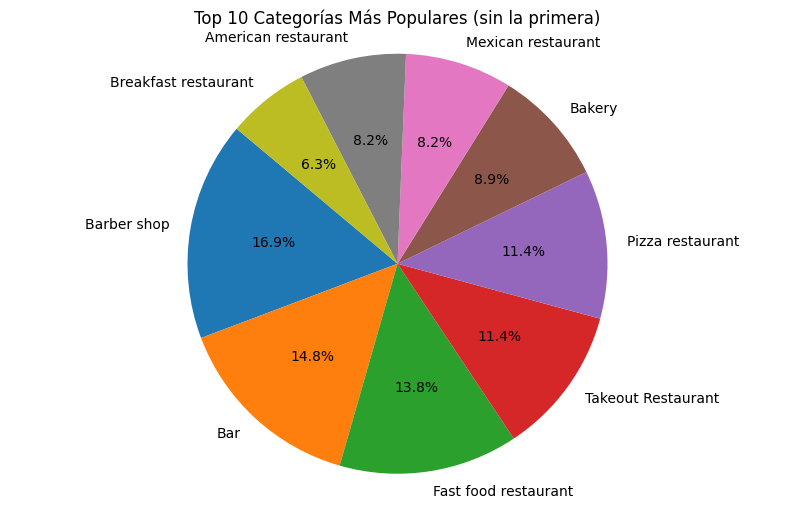

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de ocurrencias por categoría
categorias_count = metadata_filtrado_final['category'].value_counts()

# Obtener las 10 categorías más populares
top_categorias = categorias_count.head(10)

# Eliminar la primera categoría
top_categorias = top_categorias.iloc[1:]

# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(top_categorias, labels=top_categorias.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Categorías Más Populares (sin la primera)')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

Observamos la presencia de Barber shop, no está relacionado a los restaurantes, se elimina.

In [153]:
metadata_filtrado_final = metadata_filtrado_final[metadata_filtrado_final['category'] != 'Barber shop']

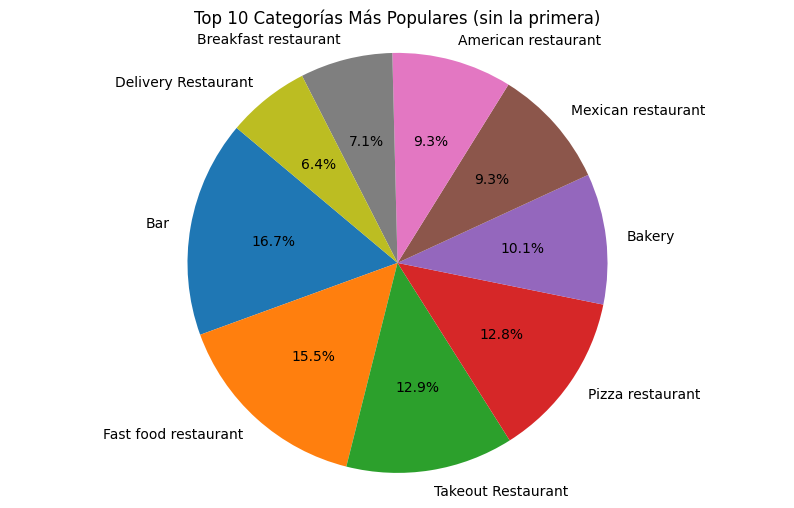

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de ocurrencias por categoría
categorias_count = metadata_filtrado_final['category'].value_counts()

# Obtener las 10 categorías más populares
top_categorias = categorias_count.head(10)

# Eliminar la primera categoría
top_categorias = top_categorias.iloc[1:]

# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(top_categorias, labels=top_categorias.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Categorías Más Populares (sin la primera)')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

Corregimos el dato anterior, ahora nos arroja que hay 271,020 locales relacionados a los servicios de restaurant en USA  

In [155]:
metadata_filtrado_final["gmap_id"].nunique()

271020

Observamos Bakery, que son panaderias, tampoco nos interesa que esten en el análisis. En esta oportunidad vamos a quitar los Bares.

In [156]:
metadata_filtrado_final = metadata_filtrado_final[metadata_filtrado_final['category'] != 'Bar']
metadata_filtrado_final = metadata_filtrado_final[metadata_filtrado_final['category'] != 'Bakery']

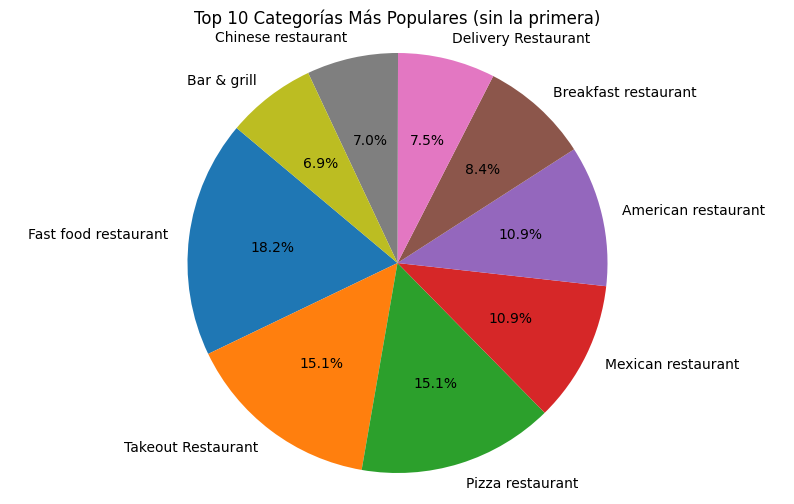

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de ocurrencias por categoría
categorias_count = metadata_filtrado_final['category'].value_counts()

# Obtener las 10 categorías más populares
top_categorias = categorias_count.head(10)

# Eliminar la primera categoría
top_categorias = top_categorias.iloc[1:]

# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(top_categorias, labels=top_categorias.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Categorías Más Populares (sin la primera)')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

Corregimos el dato anterior, ahora nos arroja que hay 240,707 locales de servicios de restaurant en USA  

In [158]:
metadata_filtrado_final["gmap_id"].nunique()

240707

## Top 5

1) Fast Food
2) Takeout
3) Pizza
4) Mexican
5) American

In [159]:
metadata_filtrado_final["gmap_id"].value_counts()

gmap_id
0x886243f0a950225d:0x1368e71fd73bd654    20
0x89e4e376418719c9:0xaac1182e84d95d3c    20
0x89c25f6a82c4a53b:0xa6197d8e648f3a60    18
0x89c6c9d5df403af7:0xa304c9f7a08ac8e3    16
0x89c6c1858f459d07:0x232f88048f3cf3da    16
                                         ..
0x89b652d57f2b61b1:0xe87a8f4ff988fbce     1
0x883b33f989786149:0x6000260957e4e150     1
0x87feadfb47b9bd07:0x1ccaed9e42cfdc       1
0x89c6717217e4383d:0x4b130bcfc16034e3     1
0x880f96c84b0ef57b:0xe75b67b15a2cfdad     1
Name: count, Length: 240707, dtype: int64

INICIO

In [160]:
# Primero, contamos cuántas veces se repite cada gmap_id
conteos = metadata_filtrado_final["gmap_id"].value_counts()

# Filtramos aquellos que aparecen más de 5 veces
gmap_ids_frecuentes = conteos[conteos > 5]

# Obtenemos solo los gmap_id que cumplen la condición
gmap_ids_frecuentes_list = gmap_ids_frecuentes.index.tolist()

# Creamos un nuevo DataFrame filtrando el original
nuevo_dataframe = metadata_filtrado_final[metadata_filtrado_final["gmap_id"].isin(gmap_ids_frecuentes_list)]

5068 restaurantes tienen más de 5 categorias, veremos como filtrar para que solo contengan 5

In [161]:
nuevo_dataframe["gmap_id"].nunique()

5068

In [162]:
nuevo_dataframe

,gmap_id,name,state,category,avg_rating,num_of_reviews
18,0x890007d78c3e5ab9:0x4f105096aaef191d,The Aynor Inn,SC,Buffet restaurant,4.3,2
19,0x890007d78c3e5ab9:0x4f105096aaef191d,The Aynor Inn,SC,Family restaurant,4.3,2
20,0x890007d78c3e5ab9:0x4f105096aaef191d,The Aynor Inn,SC,Seafood restaurant,4.3,2
34,0x87d57755954b200d:0x157d3f3bad3d37a4,Mitchell's Breakfast Burritos,AR,Restaurant,4.8,45
35,0x87d57755954b200d:0x157d3f3bad3d37a4,Mitchell's Breakfast Burritos,AR,Breakfast restaurant,4.8,45
...,...,...,...,...,...,...
512934,0x8856a028f0b0a1e7:0x7ff78df2deab30,Bojangles,NC,Chicken restaurant,3.6,98
512935,0x8856a028f0b0a1e7:0x7ff78df2deab30,Bojangles,NC,Family restaurant,3.6,98
512936,0x8856a028f0b0a1e7:0x7ff78df2deab30,Bojangles,NC,Fast food restaurant,3.6,98
512937,0x8856a028f0b0a1e7:0x7ff78df2deab30,Bojangles,NC,Takeout Restaurant,3.6,98


Primer condición, eliminar las que solo digan restaurant. <br>
 Mencionar que este filtro solo se aplica a los que tienen más de 5 categorias, dado que en el dataframe filtrado, algunos locales solo tienen como categoría Restaurant y eliminarlo haría perder datos.

In [163]:
nuevo_dataframe = nuevo_dataframe[nuevo_dataframe['category'] != 'Restaurant']

In [164]:
nuevo_dataframe

,gmap_id,name,state,category,avg_rating,num_of_reviews
18,0x890007d78c3e5ab9:0x4f105096aaef191d,The Aynor Inn,SC,Buffet restaurant,4.3,2
19,0x890007d78c3e5ab9:0x4f105096aaef191d,The Aynor Inn,SC,Family restaurant,4.3,2
20,0x890007d78c3e5ab9:0x4f105096aaef191d,The Aynor Inn,SC,Seafood restaurant,4.3,2
35,0x87d57755954b200d:0x157d3f3bad3d37a4,Mitchell's Breakfast Burritos,AR,Breakfast restaurant,4.8,45
36,0x87d57755954b200d:0x157d3f3bad3d37a4,Mitchell's Breakfast Burritos,AR,Lunch restaurant,4.8,45
...,...,...,...,...,...,...
512934,0x8856a028f0b0a1e7:0x7ff78df2deab30,Bojangles,NC,Chicken restaurant,3.6,98
512935,0x8856a028f0b0a1e7:0x7ff78df2deab30,Bojangles,NC,Family restaurant,3.6,98
512936,0x8856a028f0b0a1e7:0x7ff78df2deab30,Bojangles,NC,Fast food restaurant,3.6,98
512937,0x8856a028f0b0a1e7:0x7ff78df2deab30,Bojangles,NC,Takeout Restaurant,3.6,98


In [165]:
nuevo_dataframe["gmap_id"].value_counts()

gmap_id
0x89e4e376418719c9:0xaac1182e84d95d3c    18
0x89c25f6a82c4a53b:0xa6197d8e648f3a60    18
0x886243f0a950225d:0x1368e71fd73bd654    18
0x883863f94641b16d:0xc5fb3ffb064f9d20    16
0x89c6c1858f459d07:0x232f88048f3cf3da    16
                                         ..
0x4cb26891c0f7ab0b:0x939708325ab1b963     4
0x878dfe986500715d:0x62e99e0a18d9af6a     4
0x89e80ec1fc8dbc35:0xa49216fa8d10e33c     4
0x87d57755954b200d:0x157d3f3bad3d37a4     4
0x87e5523d8c4ac7ff:0x7201d649e8ef09e1     4
Name: count, Length: 5068, dtype: int64

In [166]:
conteos = nuevo_dataframe["gmap_id"].value_counts()

# Filtramos aquellos que aparecen más de 5 veces
gmap_ids_frecuentes = conteos[conteos > 5]

# Obtenemos solo los gmap_id que cumplen la condición
gmap_ids_frecuentes_list = gmap_ids_frecuentes.index.tolist()

# Creamos un nuevo DataFrame filtrando el original
nuevo_dataframe = nuevo_dataframe[nuevo_dataframe["gmap_id"].isin(gmap_ids_frecuentes_list)]

In [167]:
nuevo_dataframe["gmap_id"].value_counts()

gmap_id
0x886243f0a950225d:0x1368e71fd73bd654    18
0x89e4e376418719c9:0xaac1182e84d95d3c    18
0x89c25f6a82c4a53b:0xa6197d8e648f3a60    18
0x883863f94641b16d:0xc5fb3ffb064f9d20    16
0x89c6c1858f459d07:0x232f88048f3cf3da    16
                                         ..
0x80c8c47209ccb555:0x3f80ceb9af2f2804     6
0x89c0c559e58cf549:0xa000256dbf62a2b2     6
0x809ad7b41d726bad:0x68ccea2bef8348e5     6
0x89c259e006fff79b:0xc479cde80db76dde     6
0x8856a028f0b0a1e7:0x7ff78df2deab30       6
Name: count, Length: 3216, dtype: int64

3216 Restaurantes con más de 5 categorias, al haber excluido la categoria restaurant sola.

In [168]:
nuevo_dataframe["gmap_id"].nunique()

3216

In [169]:
nuevo_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22777 entries, 18 to 512938
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gmap_id         22777 non-null  object 
 1   name            22777 non-null  object 
 2   state           22777 non-null  object 
 3   category        22777 non-null  object 
 4   avg_rating      22777 non-null  float64
 5   num_of_reviews  22777 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [170]:
nuevo_dataframe["category"].value_counts()

category
Fast food restaurant     1339
Takeout Restaurant       1241
Breakfast restaurant     1115
Lunch restaurant         1006
Vegetarian restaurant     950
                         ... 
Wedding buffet              1
Kushiyaki restaurant        1
Jiangsu restaurant          1
Sukiyaki restaurant         1
Tempura restaurant          1
Name: count, Length: 269, dtype: int64

In [171]:
nuevo_dataframe["gmap_id"].value_counts()

gmap_id
0x886243f0a950225d:0x1368e71fd73bd654    18
0x89e4e376418719c9:0xaac1182e84d95d3c    18
0x89c25f6a82c4a53b:0xa6197d8e648f3a60    18
0x883863f94641b16d:0xc5fb3ffb064f9d20    16
0x89c6c1858f459d07:0x232f88048f3cf3da    16
                                         ..
0x80c8c47209ccb555:0x3f80ceb9af2f2804     6
0x89c0c559e58cf549:0xa000256dbf62a2b2     6
0x809ad7b41d726bad:0x68ccea2bef8348e5     6
0x89c259e006fff79b:0xc479cde80db76dde     6
0x8856a028f0b0a1e7:0x7ff78df2deab30       6
Name: count, Length: 3216, dtype: int64

Esta función realiza el filtro eliminando las categorias menos importantes de los que tengan más de 5 categorias. <br>
Luego de realizar la primer eliminación, vuelve a comprobar que locales tienen más de 5 categorias, enviando a un nuevo dataframe los locales que quedaron con 5 o menos categorias, luego de la eliminación.

In [172]:
import pandas as pd

def filtrar_categoria_populares(df, umbral):
    """Filtra el DataFrame para conservar solo las categorías que aparecen al menos un número de veces definido por umbral."""
    count_series = df['category'].value_counts()
    categorias_a_conservar = count_series[count_series >= umbral].index
    return df[df['category'].isin(categorias_a_conservar)]

def filtrar_gmap_id(df, max_ocurrencias):
    """Filtra los gmap_id que tienen un número máximo de ocurrencias y devuelve los DataFrames filtrados y listos."""
    conteos = df['gmap_id'].value_counts()
    gmap_id_listos = conteos[conteos <= max_ocurrencias].index
    
    # Filtrar registros para restaurantes listos
    restaurantes_listos = df[df['gmap_id'].isin(gmap_id_listos)]
    
    # Filtrar registros del DataFrame original
    df_filtrado = df[~df['gmap_id'].isin(gmap_id_listos)]
    
    return restaurantes_listos, df_filtrado

def procesar_dataframe(nuevo_dataframe, restaurantes_listos=None, umbral_categoria=2, max_ocurrencias=5):
    if restaurantes_listos is None:
        restaurantes_listos = pd.DataFrame()  # Inicializa un DataFrame vacío para acumular resultados

    # Paso 1: Filtrar categorías menos populares
    print(f'Tamaño del DataFrame antes de filtrar categorías: {len(nuevo_dataframe)}')
    nuevo_dataframe = filtrar_categoria_populares(nuevo_dataframe, umbral=umbral_categoria)
    print(f'Tamaño del DataFrame después de filtrar categorías: {len(nuevo_dataframe)}')

    # Paso 2: Filtrar gmap_id con 5 o menos ocurrencias
    nuevos_restaurantes_listos, nuevo_dataframe_filtrado = filtrar_gmap_id(nuevo_dataframe, max_ocurrencias=max_ocurrencias)

    # Acumular los restaurantes listos
    restaurantes_listos = pd.concat([restaurantes_listos, nuevos_restaurantes_listos])

    # Control de total
    total_restaurantes = restaurantes_listos['gmap_id'].nunique() + nuevo_dataframe_filtrado['gmap_id'].nunique()
    print(f'Total de gmap_id: {total_restaurantes} (debería ser 3216)')

    # Repetir el filtrado de categorías de manera recursiva
    if len(nuevo_dataframe_filtrado) > 0:
        nuevo_dataframe_filtrado = filtrar_categoria_populares(nuevo_dataframe_filtrado, umbral=umbral_categoria + 1)
        
        # Llamar a la función de forma recursiva
        return procesar_dataframe(nuevo_dataframe_filtrado, restaurantes_listos, umbral_categoria=umbral_categoria + 1, max_ocurrencias=max_ocurrencias)
    
    return restaurantes_listos, nuevo_dataframe_filtrado

# Supongamos que ya tienes el nuevo_dataframe
restaurantes_listos, nuevo_dataframe_filtrado = procesar_dataframe(nuevo_dataframe)

# Imprimir resultados finales
print("Restaurantes listos:", restaurantes_listos['gmap_id'].nunique())
print("Nuevo DataFrame filtrado:", nuevo_dataframe_filtrado['gmap_id'].nunique())


Tamaño del DataFrame antes de filtrar categorías: 22777
Tamaño del DataFrame después de filtrar categorías: 22735
Total de gmap_id: 3216 (debería ser 3216)
Tamaño del DataFrame antes de filtrar categorías: 22578
Tamaño del DataFrame después de filtrar categorías: 22578
Total de gmap_id: 3216 (debería ser 3216)
Tamaño del DataFrame antes de filtrar categorías: 22406
Tamaño del DataFrame después de filtrar categorías: 22406
Total de gmap_id: 3216 (debería ser 3216)
Tamaño del DataFrame antes de filtrar categorías: 22252
Tamaño del DataFrame después de filtrar categorías: 22252
Total de gmap_id: 3216 (debería ser 3216)
Tamaño del DataFrame antes de filtrar categorías: 22091
Tamaño del DataFrame después de filtrar categorías: 22091
Total de gmap_id: 3216 (debería ser 3216)
Tamaño del DataFrame antes de filtrar categorías: 21933
Tamaño del DataFrame después de filtrar categorías: 21933
Total de gmap_id: 3216 (debería ser 3216)
Tamaño del DataFrame antes de filtrar categorías: 21807
Tamaño d

Se pierden 4 datos (no se procesan)

In [173]:
restaurantes_listos["gmap_id"].nunique()

3212

In [174]:
restaurantes_listos["category"].nunique()

159

In [175]:
restaurantes_listos["gmap_id"].value_counts()

gmap_id
0x80c2c7c9e450aad7:0x55f6a7ac45bad129    5
0x8814b389b68b9547:0x8e1a365b4ad666ee    5
0x89c292adf54bd0cd:0x1df3d61793ba5695    5
0x89b7b5824b25b837:0x9042295f3126d49d    5
0x88e65f5a7fb60e6b:0x6031c6d5d840cdf4    5
                                        ..
0x52b7b8e4459a8697:0x81e50b7c06d172df    2
0x88f4c622c9097a8f:0xf29744c37b7e8e6a    2
0x80dc07614d1336d1:0x8f589a3746febbb0    2
0x89c25f6a82c4a53b:0xa6197d8e648f3a60    2
0x80dc736926023cb9:0xb3377acd90a46f16    2
Name: count, Length: 3212, dtype: int64

In [176]:
restaurantes_listos.head()

,gmap_id,name,state,category,avg_rating,num_of_reviews
18987,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,French restaurant,4.7,37
18988,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,French steakhouse restaurant,4.7,37
18989,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,Fusion restaurant,4.7,37
18991,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,Modern French restaurant,4.7,37
18992,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,Pizza restaurant,4.7,37


In [177]:
metadata_filtrado_final.head()

,gmap_id,name,state,category,avg_rating,num_of_reviews
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,CA,Korean restaurant,4.4,18
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Vons Chicken,CA,Restaurant,4.5,18
3,0x87ec235c54d25b31:0x3b75fb5facc602f,"Sweet Rewards Gluten Free Bakery, LLC",IA,Health food restaurant,4.7,21
4,0x884bdf439ee0d6e3:0x16676d0a5982954d,Sigman’s Diner,WV,Diner,4.6,28
5,0x89c6c89efcaed69d:0xded973f6033e7dba,Vivi Bubble Tea,PA,Restaurant,4.0,8


In [178]:
metadata_filtrado_final["gmap_id"].nunique()

240707

In [179]:
metadata_filtrado_final["gmap_id"].value_counts()

gmap_id
0x886243f0a950225d:0x1368e71fd73bd654    20
0x89e4e376418719c9:0xaac1182e84d95d3c    20
0x89c25f6a82c4a53b:0xa6197d8e648f3a60    18
0x89c6c9d5df403af7:0xa304c9f7a08ac8e3    16
0x89c6c1858f459d07:0x232f88048f3cf3da    16
                                         ..
0x89b652d57f2b61b1:0xe87a8f4ff988fbce     1
0x883b33f989786149:0x6000260957e4e150     1
0x87feadfb47b9bd07:0x1ccaed9e42cfdc       1
0x89c6717217e4383d:0x4b130bcfc16034e3     1
0x880f96c84b0ef57b:0xe75b67b15a2cfdad     1
Name: count, Length: 240707, dtype: int64

In [180]:
# Crear el DataFrame restaurantes_limpios con los valores de restaurantes_listos.head()
restaurantes_limpios = restaurantes_listos.copy()

# Paso 1: Obtener los gmap_id que ya están en restaurantes_limpios
gmap_ids_existentes = set(restaurantes_limpios['gmap_id'])

# Paso 2: Filtrar metadata_filtrado_final para excluir esos gmap_id
nuevos_restaurantes = metadata_filtrado_final[~metadata_filtrado_final['gmap_id'].isin(gmap_ids_existentes)]

# Verificamos cuántos nuevos restaurantes se han filtrado
print(f"Nuevos restaurantes a agregar: {len(nuevos_restaurantes)}")

# Paso 3: Concatenar los nuevos restaurantes al DataFrame restaurantes_limpios
restaurantes_limpios = pd.concat([restaurantes_limpios, nuevos_restaurantes], ignore_index=True)

Nuevos restaurantes a agregar: 403730


Ahora todos los restaurantes tienen hasta 5 categorias.

In [181]:
restaurantes_limpios.head()

,gmap_id,name,state,category,avg_rating,num_of_reviews
0,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,French restaurant,4.7,37
1,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,French steakhouse restaurant,4.7,37
2,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,Fusion restaurant,4.7,37
3,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,Modern French restaurant,4.7,37
4,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,Pizza restaurant,4.7,37


In [182]:
restaurantes_limpios["gmap_id"].nunique()

240707

In [183]:
restaurantes_limpios["gmap_id"].value_counts()

gmap_id
0x886243f0a950225d:0x1368e71fd73bd654    20
0x89e4e376418719c9:0xaac1182e84d95d3c    20
0x808580d0baf51259:0x24736823db702c96    14
0x87530f390e058629:0x292320115b1705ea    12
0x89c2593ee9036d41:0x36e0deb5765abdab     6
                                         ..
0x87ee9ea61a35326b:0x181754f39077bce6     1
0x89c14e27697a9547:0xa3afcf19c65e52e6     1
0x880efd3ea81e2289:0xa9246223f5d43505     1
0x80d9545a73eb381b:0x15923110c6039c47     1
0x880f96c84b0ef57b:0xe75b67b15a2cfdad     1
Name: count, Length: 240707, dtype: int64

In [184]:
restaurantes_limpios.count()

gmap_id           419226
name              419226
state             419226
category          419226
avg_rating        419226
num_of_reviews    419226
dtype: int64

In [185]:
# Contar el número de veces que aparece cada gmap_id
conteo_gmap = restaurantes_limpios['gmap_id'].value_counts()

# Filtrar los gmap_id que aparecen más de 4 veces
gmap_ids_filtrados = conteo_gmap[conteo_gmap > 4].index

# Aplicar el filtro al DataFrame original
restaurantes_limpios = restaurantes_limpios[~((restaurantes_limpios['gmap_id'].isin(gmap_ids_filtrados)) & (restaurantes_limpios['category'] == 'Restaurant'))]

Los 4 restaurantes que aparecen con más de 5 categorias son los datos perdidos en la función de filtrado ejecutada anteriormente sobre restaurantes_listos

In [186]:
restaurantes_limpios.count()

gmap_id           414485
name              414485
state             414485
category          414485
avg_rating        414485
num_of_reviews    414485
dtype: int64

In [187]:
sum((restaurantes_limpios["gmap_id"].value_counts() >5))

4

Luego de mucho tiempo intentando manejar estos datos, el principio de costo me hace continuar eliminandolos.

Establecer un porcentaje de aceptación para no ejecutar al libre albedrío.

In [188]:
# Contamos los valores de gmap_id
conteo_gmap_id = restaurantes_limpios["gmap_id"].value_counts()

# Filtramos los gmap_id que tienen un conteo mayor a 5
gmap_id_a_eliminar = conteo_gmap_id[conteo_gmap_id > 5].index

# Calculamos el total de registros en el DataFrame
total_registros = len(restaurantes_limpios)

# Calculamos cuántos registros corresponden a los gmap_id_a_eliminar
total_a_eliminar = restaurantes_limpios[restaurantes_limpios["gmap_id"].isin(gmap_id_a_eliminar)].shape[0]

# Contamos el total de gmap_id que se van a eliminar
total_gmap_id_a_eliminar = len(gmap_id_a_eliminar)

# Imprimimos el total de casos encontrados y el total de gmap_id a eliminar
print(f"Total de filas encontradas: {total_registros}")
print(f"Total de gmap_id a eliminar: {total_gmap_id_a_eliminar}")

# Verificamos si el total a eliminar es mayor al 5% del total de registros
if total_a_eliminar <= 0.05 * total_registros:
    # Si es menor o igual al 5%, los eliminamos
    restaurantes_limpios = restaurantes_limpios[~restaurantes_limpios["gmap_id"].isin(gmap_id_a_eliminar)]
    print(f"Se han eliminado {total_a_eliminar} casos.")
else:
    print("El total a eliminar excede el 5% del total de registros.")

Total de filas encontradas: 414485
Total de gmap_id a eliminar: 4
Se han eliminado 62 casos.


In [189]:
restaurantes_limpios.head()

,gmap_id,name,state,category,avg_rating,num_of_reviews
0,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,French restaurant,4.7,37
1,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,French steakhouse restaurant,4.7,37
2,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,Fusion restaurant,4.7,37
3,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,Modern French restaurant,4.7,37
4,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,Pizza restaurant,4.7,37


In [190]:
restaurantes_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414423 entries, 0 to 419225
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   gmap_id         414423 non-null  object 
 1   name            414423 non-null  object 
 2   state           414423 non-null  object 
 3   category        414423 non-null  object 
 4   avg_rating      414423 non-null  float64
 5   num_of_reviews  414423 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 22.1+ MB


Volvemos a recordar que debemos manejar los índices duplicados para evitar errores al momento de cargar en MySQL

Ahora procedemos a hacer numéricas las variables categóricas de la columna categoria.

In [191]:
import pandas as pd

# Asumiendo que 'restaurantes_limpios' ya está cargado

# 1. Obtener las categorías únicas
categorias_unicas = restaurantes_limpios['category'].unique()

# 2. Crear el Series 'categorias_filtradas'
categorias_filtradas = pd.Series(range(len(categorias_unicas)), index=categorias_unicas)

# Imprime para verificar
print("categorias_filtradas:")
print(categorias_filtradas)
print("Tipo de categorias_filtradas:", type(categorias_filtradas))

# 3. Aplicar el mapeo
restaurantes_limpios['category'] = restaurantes_limpios['category'].map(categorias_filtradas)

# 4. Manejar los NaN (en este caso, imputamos con -1)
restaurantes_limpios['category'] = restaurantes_limpios['category'].fillna(-1)

# 5. Imprime el resultado
print("\nrestaurantes_limpios después del mapeo:")
print(restaurantes_limpios)

categorias_filtradas:
French restaurant                 0
French steakhouse restaurant      1
Fusion restaurant                 2
Modern French restaurant          3
Pizza restaurant                  4
                               ... 
Sfiha restaurant                346
Mutton barbecue restaurant      347
Steamboat restaurant            348
Sundanese restaurant            349
Tempura donburi restaurant      350
Length: 351, dtype: int64
Tipo de categorias_filtradas: <class 'pandas.core.series.Series'>

restaurantes_limpios después del mapeo:
                                      gmap_id                            name  \
0       0x80c2c7c9e450aad7:0x55f6a7ac45bad129            L'APPART by AIR FOOD   
1       0x80c2c7c9e450aad7:0x55f6a7ac45bad129            L'APPART by AIR FOOD   
2       0x80c2c7c9e450aad7:0x55f6a7ac45bad129            L'APPART by AIR FOOD   
3       0x80c2c7c9e450aad7:0x55f6a7ac45bad129            L'APPART by AIR FOOD   
4       0x80c2c7c9e450aad7:0x55f6a7ac45bad12

Comprobamos el nuevo orden e índices utilizados para el mapeo y vemos que no hay duplicados.

In [192]:
categorias_filtradas

French restaurant                 0
French steakhouse restaurant      1
Fusion restaurant                 2
Modern French restaurant          3
Pizza restaurant                  4
                               ... 
Sfiha restaurant                346
Mutton barbecue restaurant      347
Steamboat restaurant            348
Sundanese restaurant            349
Tempura donburi restaurant      350
Length: 351, dtype: int64

In [193]:
categorias_filtradas.duplicated().value_counts()

False    351
Name: count, dtype: int64

In [194]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)


# Guarda el DataFrame como un archivo CSV en la carpeta "metadata"
categorias_filtradas.to_csv(os.path.join(ruta_metadata, "categorias.csv"))

In [195]:
restaurantes_limpios

,gmap_id,name,state,category,avg_rating,num_of_reviews
0,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,0,4.7,37
1,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,1,4.7,37
2,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,2,4.7,37
3,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,3,4.7,37
4,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,4,4.7,37
...,...,...,...,...,...,...
419221,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Domino's Pizza,WY,34,4.1,178
419222,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Domino's Pizza,WY,35,4.1,178
419223,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Domino's Pizza,WY,4,4.1,178
419224,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Domino's Pizza,WY,31,4.1,178


In [196]:
restaurantes_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414423 entries, 0 to 419225
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   gmap_id         414423 non-null  object 
 1   name            414423 non-null  object 
 2   state           414423 non-null  object 
 3   category        414423 non-null  int64  
 4   avg_rating      414423 non-null  float64
 5   num_of_reviews  414423 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 22.1+ MB


Corroboramos el máximo de hasta 5 categorias.

In [197]:
restaurantes_limpios["gmap_id"].value_counts()

gmap_id
0x80c2c7c9e450aad7:0x55f6a7ac45bad129    5
0x87694ae7058a6d99:0xa8e21e78cf48b6e0    5
0x89e5d598f1ff49a1:0x945ff6a844374d64    5
0x89c25544d8ee5f8b:0x9595fc333e6dd0cb    5
0x89e44e6d712f203f:0xc16c2235fc2edd0b    5
                                        ..
0x880e2811ba88fa5b:0xae7ad5693c37aeba    1
0x880e2f5c80fb010f:0xf6f392f7e160f0ae    1
0x88d906d3523e769d:0xb7a7c21af5ae93dc    1
0x88d91dbafaa5b5d5:0x2a6eb66ba5d022b9    1
0x880f96c84b0ef57b:0xe75b67b15a2cfdad    1
Name: count, Length: 240703, dtype: int64

El número clave que siempre debe controlarse es el total de locales, en este análisis es 240,703.

In [198]:
restaurantes_limpios["gmap_id"].nunique()

240703

Todo funciona, ahora debemos hacer un explode de category

In [199]:
import pandas as pd

# Paso 1: Agrupar por 'gmap_id' y crear una lista de categorías
restaurantes_agrupados = restaurantes_limpios.groupby('gmap_id')['category'].apply(list).reset_index()

# Paso 2: Expandir las categorías en columnas separadas
categorias_expandidas = restaurantes_agrupados['category'].apply(lambda x: pd.Series(x)).rename(
    columns=lambda x: f'Categoria{x + 1}' if x is not None else x
)

# Paso 3: Unir el DataFrame original con los datos agrupados (sin duplicados)
restaurantes_limpios = restaurantes_limpios.drop('category', axis=1, errors='ignore')  # Ignorar si no existe
restaurantes_limpios = pd.merge(restaurantes_limpios.drop_duplicates(subset='gmap_id'), 
                                 restaurantes_agrupados, 
                                 on='gmap_id', 
                                 how='left')

# Paso 4: Concatenar las categorías expandidas
restaurantes_limpios = pd.concat([restaurantes_limpios, categorias_expandidas], axis=1)

# Paso 5: Verificar duplicados en el DataFrame final
duplicados_final = restaurantes_limpios[restaurantes_limpios.duplicated(subset='gmap_id', keep=False)]
print(duplicados_final)


Empty DataFrame
Columns: [gmap_id, name, state, avg_rating, num_of_reviews, category, Categoria1, Categoria2, Categoria3, Categoria4, Categoria5]
Index: []


In [200]:
restaurantes_limpios

,gmap_id,name,state,avg_rating,num_of_reviews,category,Categoria1,Categoria2,Categoria3,Categoria4,Categoria5
0,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,4.7,37,"[0, 1, 2, 3, 4]",159.0,NaN,NaN,NaN,NaN
1,0x89c6b305f0dcfb8d:0x6d14e883fec24c42,Little Istanbul Restaurant,PA,4.5,349,"[5, 6, 7, 8, 9]",25.0,159.0,NaN,NaN,NaN
2,0x80dd2971a83ea65b:0xb1b8e4120e0b0348,Garage Fish,CA,4.2,8,"[10, 11, 12, 13, 14]",24.0,NaN,NaN,NaN,NaN
3,0x886b57f69379908d:0xced3f89bd038e2c5,Homey Hot Pot & Sushi Buffet,IN,4.5,278,"[15, 16, 17, 18, 19]",21.0,NaN,NaN,NaN,NaN
4,0x89e1f86ecb300001:0x59cbfb48a60a2243,Oak & Grain,NH,4.9,18,"[20, 21, 22, 13, 23]",21.0,159.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
240698,0x87c92eaea0fef483:0xb73c49fa00698f31,T&A Saloon,AR,4.6,36,"[61, 63]",163.0,NaN,NaN,NaN,NaN
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,Asian Cuisine # 2,WY,4.3,38,"[159, 34]",157.0,NaN,NaN,NaN,NaN
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Rosa’s Mexican Grill Chandler,AZ,4.4,88,[37],30.0,NaN,NaN,NaN,NaN
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Domino's Pizza,WY,4.1,178,"[34, 35, 4, 31]",68.0,159.0,NaN,NaN,NaN


El número mágico.

In [201]:
restaurantes_limpios["Categoria1"].count()

240703

Coincide rotundamente con el total de locales, al menos 1 categoría cada uno.

In [202]:
restaurantes_limpios["gmap_id"].nunique()

240703

In [203]:
restaurantes_limpios["gmap_id"].count()

240703

In [204]:
restaurantes_limpios["Categoria2"].count()

91691

In [205]:
restaurantes_limpios["Categoria3"].count()

52272

In [206]:
restaurantes_limpios["Categoria4"].count()

22574

In [207]:
restaurantes_limpios["Categoria5"].count()

7183

In [208]:
restaurantes_limpios

,gmap_id,name,state,avg_rating,num_of_reviews,category,Categoria1,Categoria2,Categoria3,Categoria4,Categoria5
0,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,4.7,37,"[0, 1, 2, 3, 4]",159.0,NaN,NaN,NaN,NaN
1,0x89c6b305f0dcfb8d:0x6d14e883fec24c42,Little Istanbul Restaurant,PA,4.5,349,"[5, 6, 7, 8, 9]",25.0,159.0,NaN,NaN,NaN
2,0x80dd2971a83ea65b:0xb1b8e4120e0b0348,Garage Fish,CA,4.2,8,"[10, 11, 12, 13, 14]",24.0,NaN,NaN,NaN,NaN
3,0x886b57f69379908d:0xced3f89bd038e2c5,Homey Hot Pot & Sushi Buffet,IN,4.5,278,"[15, 16, 17, 18, 19]",21.0,NaN,NaN,NaN,NaN
4,0x89e1f86ecb300001:0x59cbfb48a60a2243,Oak & Grain,NH,4.9,18,"[20, 21, 22, 13, 23]",21.0,159.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
240698,0x87c92eaea0fef483:0xb73c49fa00698f31,T&A Saloon,AR,4.6,36,"[61, 63]",163.0,NaN,NaN,NaN,NaN
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,Asian Cuisine # 2,WY,4.3,38,"[159, 34]",157.0,NaN,NaN,NaN,NaN
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Rosa’s Mexican Grill Chandler,AZ,4.4,88,[37],30.0,NaN,NaN,NaN,NaN
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Domino's Pizza,WY,4.1,178,"[34, 35, 4, 31]",68.0,159.0,NaN,NaN,NaN


In [209]:
restaurantes_limpios = restaurantes_limpios[["gmap_id","name","state","avg_rating","num_of_reviews","Categoria1","Categoria2","Categoria3","Categoria4","Categoria5"]]

In [210]:
restaurantes_limpios["Nombre"]        =restaurantes_limpios["name"]
restaurantes_limpios["Estado"]        =restaurantes_limpios["state"]
restaurantes_limpios["Promedio"]      =restaurantes_limpios["avg_rating"]
restaurantes_limpios["Valoraciones"]  =restaurantes_limpios["num_of_reviews"]

restaurantes_limpios = restaurantes_limpios[["gmap_id","Nombre","Estado","Promedio","Valoraciones","Categoria1","Categoria2","Categoria3","Categoria4","Categoria5"]]

In [211]:
restaurantes_limpios.duplicated().value_counts()

False    240703
Name: count, dtype: int64

In [212]:
restaurantes_limpios.drop_duplicates(inplace=True)

In [213]:
restaurantes_limpios["gmap_id"].nunique()

240703

In [214]:
restaurantes_limpios["gmap_id"].count()

240703

In [215]:
restaurantes_limpios["gmap_id"].value_counts()

gmap_id
0x80c2c7c9e450aad7:0x55f6a7ac45bad129    1
0x8873e07871d275eb:0x9dd8d0c9b23695d2    1
0x89c6d5a8f60d085b:0x3a966afe342fbfb4    1
0x89c6c21b4e4beee5:0x6d2900dea1ddb848    1
0x87d33f2220fd80a3:0xba25ae288fa3c32d    1
                                        ..
0x8640e5fb0c9b7e0f:0xea5ca33eede2b328    1
0x80c8d0f2fd33719f:0x100d03eb7ed51e57    1
0x8640e8dc6fd36a0d:0xeae669ac9027c655    1
0x808f7f1784285279:0x4a792649ec5f901     1
0x880f96c84b0ef57b:0xe75b67b15a2cfdad    1
Name: count, Length: 240703, dtype: int64

In [216]:
restaurantes_limpios

,gmap_id,Nombre,Estado,Promedio,Valoraciones,Categoria1,Categoria2,Categoria3,Categoria4,Categoria5
0,0x80c2c7c9e450aad7:0x55f6a7ac45bad129,L'APPART by AIR FOOD,CA,4.7,37,159.0,NaN,NaN,NaN,NaN
1,0x89c6b305f0dcfb8d:0x6d14e883fec24c42,Little Istanbul Restaurant,PA,4.5,349,25.0,159.0,NaN,NaN,NaN
2,0x80dd2971a83ea65b:0xb1b8e4120e0b0348,Garage Fish,CA,4.2,8,24.0,NaN,NaN,NaN,NaN
3,0x886b57f69379908d:0xced3f89bd038e2c5,Homey Hot Pot & Sushi Buffet,IN,4.5,278,21.0,NaN,NaN,NaN,NaN
4,0x89e1f86ecb300001:0x59cbfb48a60a2243,Oak & Grain,NH,4.9,18,21.0,159.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
240698,0x87c92eaea0fef483:0xb73c49fa00698f31,T&A Saloon,AR,4.6,36,163.0,NaN,NaN,NaN,NaN
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,Asian Cuisine # 2,WY,4.3,38,157.0,NaN,NaN,NaN,NaN
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Rosa’s Mexican Grill Chandler,AZ,4.4,88,30.0,NaN,NaN,NaN,NaN
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Domino's Pizza,WY,4.1,178,68.0,159.0,NaN,NaN,NaN


In [217]:
restaurantes_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240703 entries, 0 to 240702
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   gmap_id       240703 non-null  object 
 1   Nombre        240703 non-null  object 
 2   Estado        240703 non-null  object 
 3   Promedio      240703 non-null  float64
 4   Valoraciones  240703 non-null  int64  
 5   Categoria1    240703 non-null  float64
 6   Categoria2    91691 non-null   float64
 7   Categoria3    52272 non-null   float64
 8   Categoria4    22574 non-null   float64
 9   Categoria5    7183 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 18.4+ MB


In [218]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)

# Guarda el DataFrame como un archivo CSV en la carpeta "metadata"
restaurantes_limpios.to_csv(os.path.join(ruta_metadata, "restaurantes.csv"), index=False)

In [219]:
# Tiempo de fin
fin = time.time()

# Cálculo del tiempo transcurrido en minutos
tiempo_transcurrido = (fin - inicio) / 60  # Convertimos a minutos

# Impresión del tiempo transcurrido
print(f'Tiempo transcurrido: {tiempo_transcurrido:.2f} minutos')

Tiempo transcurrido: 4.56 minutos


Location

In [220]:
metadata_direcciones

,gmap_id,address,latitude,longitude
0,0x88f16e41928ff687:0x883dad4fd048e8f8,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",32.388300,-83.357100
1,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",34.018891,-118.215290
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",34.058092,-118.292130
3,0x80c2c89923b27a41:0x32041559418d447,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",34.023669,-118.232930
4,0x80c2c632f933b073:0xc31785961fe826a6,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",34.036694,-118.249421
...,...,...,...,...
3025006,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,"The Green Room Of Libertyville, 624 Milwaukee ...",42.289450,-87.954386
3025007,0x80901260b5987b39:0x8a5028c253e7bee6,"Klein Brothers Packaging, 1515 S Fresno Ave, S...",37.934318,-121.313102
3025008,0x8758dd1e2533c991:0x5f6d112918f07dba,"Profiles Hair Design, 522 N Federal Blvd, Rive...",43.029664,-108.380849
3025009,0x872b6f6f24aea445:0x22df9e5dd01e67ba,"Arizona LINE-X, 21242 N Black Canyon Hwy #A, P...",33.680066,-112.113367


In [221]:
# Filtrar el DataFrame metadata_direcciones
direcciones_restaurantes = metadata_direcciones[metadata_direcciones['gmap_id'].isin(restaurantes_limpios['gmap_id'])]

In [222]:
direcciones_restaurantes

,gmap_id,address,latitude,longitude
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",34.058092,-118.292130
6,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",33.916402,-118.010855
8,0x87ec235c54d25b31:0x3b75fb5facc602f,"Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",41.616079,-93.865487
43,0x884bdf439ee0d6e3:0x16676d0a5982954d,"Sigman’s Diner, 517 Elk St, Gassaway, WV 26624",38.672489,-80.774893
68,0x89c6c89efcaed69d:0xded973f6033e7dba,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",39.940293,-75.150923
...,...,...,...,...
3024980,0x87c92eaea0fef483:0xb73c49fa00698f31,"T&A Saloon, 7448 AR-187, Eureka Springs, AR 72631",36.453379,-93.833236
3025002,0x8758ddd1bfd14845:0xfd904490a700f0e,"Asian Cuisine # 2, 302 N Federal Blvd, Riverto...",43.026975,-108.380989
3025004,0x872ba99db0ab78db:0x55c826ed8748149d,"Rosa’s Mexican Grill Chandler, 3002 N Arizona ...",33.351057,-111.842995
3025005,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,"Domino's Pizza, 804 N Federal Blvd, Riverton, ...",43.031526,-108.381641


In [223]:
direcciones_restaurantes["gmap_id"].count()

241948

In [224]:
direcciones_restaurantes.drop_duplicates(inplace=True)

C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\1073234041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direcciones_restaurantes.drop_duplicates(inplace=True)


Control de gmap_id

In [225]:
print(direcciones_restaurantes["gmap_id"].count() -restaurantes_limpios["gmap_id"].count())

0


In [226]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)

# Guarda el DataFrame como un archivo CSV en la carpeta "metadata"
direcciones_restaurantes.to_csv(os.path.join(ruta_metadata, "direcciones.csv"), index=False)

MISC

In [227]:
metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",GA,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,CA,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",CA,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",CA,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},CA,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025006,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",0x880f96c84b0ef57b:0xe75b67b15a2cfdad,"Innovative, globally inspired dishes are paire...",42.289450,-87.954386,"[Restaurant, Bar]",4.6,228,$$,"[[Saturday, 4:30–9PM], [Sunday, Closed], [Mond...","{'Service options': ['Curbside pickup', 'No-co...",IL,"[0x880f96c848329bd5:0x5a6609c274091c81, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
3025007,Klein Brothers Packaging,"Klein Brothers Packaging, 1515 S Fresno Ave, S...",0x80901260b5987b39:0x8a5028c253e7bee6,None,37.934318,-121.313102,[Trucking company],4.2,3,None,"[[Saturday, 10AM–1PM], [Sunday, Closed], [Mond...",None,CA,"[0x80900c2bd9b41a37:0x5de883f3a0746a61, 0x8090...",https://www.google.com/maps/place//data=!4m2!3...
3025008,Profiles Hair Design,"Profiles Hair Design, 522 N Federal Blvd, Rive...",0x8758dd1e2533c991:0x5f6d112918f07dba,None,43.029664,-108.380849,"[Beauty salon, Hair salon]",4.7,76,None,"[[Saturday, 9AM–4PM], [Sunday, Closed], [Monda...",{'Accessibility': ['Wheelchair accessible entr...,WY,"[0x8758dd1ffba87d8f:0xf211a1ebf7297000, 0x8758...",https://www.google.com/maps/place//data=!4m2!3...
3025009,Arizona LINE-X,"Arizona LINE-X, 21242 N Black Canyon Hwy #A, P...",0x872b6f6f24aea445:0x22df9e5dd01e67ba,None,33.680066,-112.113367,"[Truck accessories store, Powder coating service]",4.6,24,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...","{'Service options': ['In-store shopping'], 'Pa...",AZ,"[0x872b6f9d1b41ad95:0x94a335fc923f0987, 0x872b...",https://www.google.com/maps/place//data=!4m2!3...


In [228]:
restaurantes_limpios= pd.read_csv("Datos Limpios\\metadata\\restaurantes.csv")

In [229]:
# Filtrar el DataFrame metadata_direcciones
Misc_Restaurantes_Final = metadata[metadata['gmap_id'].isin(restaurantes_limpios['gmap_id'])]

In [230]:
Misc_Restaurantes_Final

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",CA,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
6,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,None,33.916402,-118.010855,[Restaurant],4.5,18,None,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...","{'Service options': ['Outdoor seating', 'Curbs...",CA,None,https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,None,41.616079,-93.865487,"[Bakery, Health food restaurant]",4.7,21,None,"[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM...",{'Service options': ['Delivery']},IA,"[0x87ee974869295555:0x95f310d065882c9b, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
43,Sigman’s Diner,"Sigman’s Diner, 517 Elk St, Gassaway, WV 26624",0x884bdf439ee0d6e3:0x16676d0a5982954d,None,38.672489,-80.774893,[Diner],4.6,28,None,"[[Thursday, 7AM–2PM], [Friday, 7AM–2PM], [Satu...","{'Service options': ['Takeout', 'Dine-in', 'De...",WV,[0x884bcf5834725e7d:0x537d8a1a05e15936],https://www.google.com/maps/place//data=!4m2!3...
68,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,[Restaurant],4.0,8,None,None,"{'Service options': ['Delivery'], 'Amenities':...",PA,"[0x89c6c62a40f4b733:0x73bfeec1898f272b, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024980,T&A Saloon,"T&A Saloon, 7448 AR-187, Eureka Springs, AR 72631",0x87c92eaea0fef483:0xb73c49fa00698f31,None,36.453379,-93.833236,"[Bar & grill, Karaoke bar, Pub]",4.6,36,None,"[[Saturday, 8AM–7PM], [Sunday, 8AM–4PM], [Mond...","{'Service options': ['Outdoor seating', 'Takeo...",AR,"[0x87ced2baabb09555:0x718155ce74fb9136, 0x87c9...",https://www.google.com/maps/place//data=!4m2!3...
3025002,Asian Cuisine # 2,"Asian Cuisine # 2, 302 N Federal Blvd, Riverto...",0x8758ddd1bfd14845:0xfd904490a700f0e,None,43.026975,-108.380989,"[Restaurant, Delivery Restaurant]",4.3,38,None,None,"{'Service options': ['Takeout'], 'Popular for'...",WY,"[0x8758dd1d991c5989:0xbeaa8c88292bc330, 0x8758...",https://www.google.com/maps/place//data=!4m2!3...
3025004,Rosa’s Mexican Grill Chandler,"Rosa’s Mexican Grill Chandler, 3002 N Arizona ...",0x872ba99db0ab78db:0x55c826ed8748149d,None,33.351057,-111.842995,[Mexican restaurant],4.4,88,None,"[[Saturday, 11AM–9PM], [Sunday, Closed], [Mond...","{'Service options': ['Takeout', 'Dine-in'], 'H...",AZ,None,https://www.google.com/maps/place//data=!4m2!3...
3025005,Domino's Pizza,"Domino's Pizza, 804 N Federal Blvd, Riverton, ...",0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Delivery/carryout chain offering a wide range ...,43.031526,-108.381641,"[Pizza delivery, Delivery Restaurant, Takeout ...",4.1,178,$,"[[Saturday, 10:30AM–1AM], [Sunday, 10:30AM–12A...","{'Service options': ['Curbside pickup', 'No-co...",WY,"[0x8758dd1d78e34a05:0x18c8d4d86049360c, 0x8758...",https://www.google.com/maps/place//data=!4m2!3...


In [231]:
Misc_Restaurantes_Final["gmap_id"].drop_duplicates(inplace=True)

C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\2808753054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Misc_Restaurantes_Final["gmap_id"].drop_duplicates(inplace=True)


In [232]:
Misc_Restaurantes_Final = Misc_Restaurantes_Final[["gmap_id","MISC"]]

In [233]:
Misc_Restaurantes_Final

,gmap_id,MISC
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"{'Service options': ['Takeout', 'Dine-in', 'De..."
6,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,"{'Service options': ['Outdoor seating', 'Curbs..."
8,0x87ec235c54d25b31:0x3b75fb5facc602f,{'Service options': ['Delivery']}
43,0x884bdf439ee0d6e3:0x16676d0a5982954d,"{'Service options': ['Takeout', 'Dine-in', 'De..."
68,0x89c6c89efcaed69d:0xded973f6033e7dba,"{'Service options': ['Delivery'], 'Amenities':..."
...,...,...
3024980,0x87c92eaea0fef483:0xb73c49fa00698f31,"{'Service options': ['Outdoor seating', 'Takeo..."
3025002,0x8758ddd1bfd14845:0xfd904490a700f0e,"{'Service options': ['Takeout'], 'Popular for'..."
3025004,0x872ba99db0ab78db:0x55c826ed8748149d,"{'Service options': ['Takeout', 'Dine-in'], 'H..."
3025005,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,"{'Service options': ['Curbside pickup', 'No-co..."


In [234]:
# Convertimos la columna MISC a un DataFrame
misc_df = pd.json_normalize(Misc_Restaurantes_Final['MISC'])

# Unir el nuevo DataFrame con el original
MISC = pd.concat([Misc_Restaurantes_Final.drop(columns=['MISC']), misc_df], axis=1)


In [235]:
MISC

,gmap_id,Service options,Accessibility,Offerings,Amenities,Atmosphere,Health & safety,Popular for,Dining options,Crowd,Highlights,Payments,Planning,From the business,Recycling,Health and safety
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,[Delivery],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,"[Dine-in, Delivery]","[Wheelchair accessible entrance, Wheelchair ac...",[Comfort food],[Good for kids],[Casual],NaN,NaN,"[Lunch, Dinner]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0x87ec235c54d25b31:0x3b75fb5facc602f,"[Delivery, Takeout, Dine-in]",[Wheelchair accessible entrance],"[Comfort food, Quick bite]",NaN,[Casual],NaN,"[Dinner, Solo dining]",NaN,[Groups],NaN,NaN,NaN,NaN,NaN,NaN
43,0x884bdf439ee0d6e3:0x16676d0a5982954d,"[Takeout, Dine-in, Delivery]",[Wheelchair accessible entrance],NaN,[Good for kids],[Casual],NaN,[Solo dining],[Dessert],"[Groups, Tourists]",NaN,NaN,NaN,NaN,NaN,NaN
68,0x89c6c89efcaed69d:0xded973f6033e7dba,"[Dine-in, Delivery]","[Wheelchair accessible entrance, Wheelchair ac...","[Alcohol, Beer, Cocktails, Comfort food, Hard ...","[Bar onsite, Good for kids]",[Casual],NaN,"[Lunch, Dinner]","[Lunch, Dinner]","[Groups, Locals]","[Great beer selection, Great cocktails]",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241943,NaN,"[Outdoor seating, Takeout, Dine-in, Delivery]",[Wheelchair accessible entrance],"[Alcohol, Coffee, Comfort food, Food, Food at ...",[Restroom],"[Casual, Cozy]",NaN,"[Lunch, Dinner, Solo dining]",[Dessert],"[Groups, Tourists]","[Fast service, Live music]",NaN,NaN,NaN,NaN,NaN
241944,NaN,[Takeout],[Wheelchair accessible entrance],"[Comfort food, Healthy options, Quick bite, Sm...",[Good for kids],"[Casual, Cozy]",NaN,"[Lunch, Dinner, Solo dining]",NaN,[Groups],NaN,NaN,NaN,NaN,NaN,NaN
241945,NaN,"[Takeout, Dine-in]","[Wheelchair accessible entrance, Wheelchair ac...","[Alcohol, Beer, Comfort food, Happy hour drink...","[Bar onsite, Good for kids, High chairs, Restr...","[Casual, Cozy]",[Mask required],"[Lunch, Dinner, Solo dining]","[Lunch, Dinner, Catering, Dessert, Seating]","[Family-friendly, Groups]","[LGBTQ friendly, Sports, Transgender safespace]","[Debit cards, Credit cards]",[Accepts reservations],NaN,NaN,NaN
241946,NaN,"[Curbside pickup, No-contact delivery, Deliver...",[Wheelchair accessible entrance],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
MISC = MISC[["gmap_id","Service options","Accessibility","Amenities","Popular for","Crowd","Highlights","Payments","Planning","From the business"]]

In [237]:
MISC

,gmap_id,Service options,Accessibility,Amenities,Popular for,Crowd,Highlights,Payments,Planning,From the business
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,[Delivery],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,"[Dine-in, Delivery]","[Wheelchair accessible entrance, Wheelchair ac...",[Good for kids],NaN,NaN,NaN,NaN,NaN,NaN
8,0x87ec235c54d25b31:0x3b75fb5facc602f,"[Delivery, Takeout, Dine-in]",[Wheelchair accessible entrance],NaN,"[Dinner, Solo dining]",[Groups],NaN,NaN,NaN,NaN
43,0x884bdf439ee0d6e3:0x16676d0a5982954d,"[Takeout, Dine-in, Delivery]",[Wheelchair accessible entrance],[Good for kids],[Solo dining],"[Groups, Tourists]",NaN,NaN,NaN,NaN
68,0x89c6c89efcaed69d:0xded973f6033e7dba,"[Dine-in, Delivery]","[Wheelchair accessible entrance, Wheelchair ac...","[Bar onsite, Good for kids]","[Lunch, Dinner]","[Groups, Locals]","[Great beer selection, Great cocktails]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
241943,NaN,"[Outdoor seating, Takeout, Dine-in, Delivery]",[Wheelchair accessible entrance],[Restroom],"[Lunch, Dinner, Solo dining]","[Groups, Tourists]","[Fast service, Live music]",NaN,NaN,NaN
241944,NaN,[Takeout],[Wheelchair accessible entrance],[Good for kids],"[Lunch, Dinner, Solo dining]",[Groups],NaN,NaN,NaN,NaN
241945,NaN,"[Takeout, Dine-in]","[Wheelchair accessible entrance, Wheelchair ac...","[Bar onsite, Good for kids, High chairs, Restr...","[Lunch, Dinner, Solo dining]","[Family-friendly, Groups]","[LGBTQ friendly, Sports, Transgender safespace]","[Debit cards, Credit cards]",[Accepts reservations],NaN
241946,NaN,"[Curbside pickup, No-contact delivery, Deliver...",[Wheelchair accessible entrance],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
MISC["gmap_id"].isnull().value_counts()

gmap_id
False    241948
True     230717
Name: count, dtype: int64

In [239]:
MISC["gmap_id"].replace("", np.nan, inplace=True)
MISC = MISC.dropna(subset=["gmap_id"])

C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\2139738616.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MISC["gmap_id"].replace("", np.nan, inplace=True)
C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\2139738616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MISC["gmap_id"].replace("", np.nan, inplace=True)


In [240]:
MISC["gmap_id"].isnull().value_counts()

gmap_id
False    241948
Name: count, dtype: int64

In [241]:
MISC

,gmap_id,Service options,Accessibility,Amenities,Popular for,Crowd,Highlights,Payments,Planning,From the business
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,[Delivery],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,"[Dine-in, Delivery]","[Wheelchair accessible entrance, Wheelchair ac...",[Good for kids],NaN,NaN,NaN,NaN,NaN,NaN
8,0x87ec235c54d25b31:0x3b75fb5facc602f,"[Delivery, Takeout, Dine-in]",[Wheelchair accessible entrance],NaN,"[Dinner, Solo dining]",[Groups],NaN,NaN,NaN,NaN
43,0x884bdf439ee0d6e3:0x16676d0a5982954d,"[Takeout, Dine-in, Delivery]",[Wheelchair accessible entrance],[Good for kids],[Solo dining],"[Groups, Tourists]",NaN,NaN,NaN,NaN
68,0x89c6c89efcaed69d:0xded973f6033e7dba,"[Dine-in, Delivery]","[Wheelchair accessible entrance, Wheelchair ac...","[Bar onsite, Good for kids]","[Lunch, Dinner]","[Groups, Locals]","[Great beer selection, Great cocktails]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3024980,0x87c92eaea0fef483:0xb73c49fa00698f31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3025002,0x8758ddd1bfd14845:0xfd904490a700f0e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3025004,0x872ba99db0ab78db:0x55c826ed8748149d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3025005,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
MISC = MISC [["gmap_id","Service options","Accessibility","Amenities","Popular for","Crowd","Payments","Highlights"]]

Hay mucha información perdida

In [243]:
MISC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241948 entries, 2 to 3025006
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gmap_id          241948 non-null  object
 1   Service options  10598 non-null   object
 2   Accessibility    7773 non-null    object
 3   Amenities        8307 non-null    object
 4   Popular for      6288 non-null    object
 5   Crowd            5759 non-null    object
 6   Payments         4338 non-null    object
 7   Highlights       3708 non-null    object
dtypes: object(8)
memory usage: 16.6+ MB


In [244]:
Misc_Restaurantes_Final["gmap_id"].duplicated().value_counts()

gmap_id
False    240703
True       1245
Name: count, dtype: int64

In [245]:
Misc_Restaurantes_Final = Misc_Restaurantes_Final.drop_duplicates(subset=["gmap_id"], keep='first')

In [246]:
Misc_Restaurantes_Final

,gmap_id,MISC
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"{'Service options': ['Takeout', 'Dine-in', 'De..."
6,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,"{'Service options': ['Outdoor seating', 'Curbs..."
8,0x87ec235c54d25b31:0x3b75fb5facc602f,{'Service options': ['Delivery']}
43,0x884bdf439ee0d6e3:0x16676d0a5982954d,"{'Service options': ['Takeout', 'Dine-in', 'De..."
68,0x89c6c89efcaed69d:0xded973f6033e7dba,"{'Service options': ['Delivery'], 'Amenities':..."
...,...,...
3024980,0x87c92eaea0fef483:0xb73c49fa00698f31,"{'Service options': ['Outdoor seating', 'Takeo..."
3025002,0x8758ddd1bfd14845:0xfd904490a700f0e,"{'Service options': ['Takeout'], 'Popular for'..."
3025004,0x872ba99db0ab78db:0x55c826ed8748149d,"{'Service options': ['Takeout', 'Dine-in'], 'H..."
3025005,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,"{'Service options': ['Curbside pickup', 'No-co..."


In [247]:
Misc_Restaurantes_Final.to_csv("MISC.csv",index = False)

In [248]:
import numpy as np
import pandas as pd
MISC = pd.read_csv("MISC.csv")

In [249]:
MISC

,gmap_id,MISC
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"{'Service options': ['Takeout', 'Dine-in', 'De..."
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,"{'Service options': ['Outdoor seating', 'Curbs..."
2,0x87ec235c54d25b31:0x3b75fb5facc602f,{'Service options': ['Delivery']}
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,"{'Service options': ['Takeout', 'Dine-in', 'De..."
4,0x89c6c89efcaed69d:0xded973f6033e7dba,"{'Service options': ['Delivery'], 'Amenities':..."
...,...,...
240698,0x87c92eaea0fef483:0xb73c49fa00698f31,"{'Service options': ['Outdoor seating', 'Takeo..."
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,"{'Service options': ['Takeout'], 'Popular for'..."
240700,0x872ba99db0ab78db:0x55c826ed8748149d,"{'Service options': ['Takeout', 'Dine-in'], 'H..."
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,"{'Service options': ['Curbside pickup', 'No-co..."


In [250]:
MISC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240703 entries, 0 to 240702
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   gmap_id  240703 non-null  object
 1   MISC     237817 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [251]:
import pandas as pd
import ast

def convert_to_dict(item):
    try:
        return ast.literal_eval(item)
    except (ValueError, SyntaxError):
        return {}  # Retorna un diccionario vacío si no puede convertir

def extract_misc_info(row):
    if isinstance(row['MISC'], str):
        try:
            misc_dict = ast.literal_eval(row['MISC'])
            return misc_dict
        except (ValueError, SyntaxError):
            return {}  # Retorna un diccionario vacío si no puede convertir
    elif isinstance(row['MISC'], dict):
        return row['MISC']
    else:
        return {}  # Retorna un diccionario vacío si no es un diccionario válido

# Paso 1: Aplicar la función para extraer la información de la columna 'MISC'
MISC['MISC_INFO'] = MISC.apply(extract_misc_info, axis=1)

# Paso 2: Crear columnas separadas para cada clave del diccionario
MISC_expanded = MISC['MISC_INFO'].apply(pd.Series)
MISC = pd.concat([MISC, MISC_expanded], axis=1)
MISC.drop(columns=['MISC_INFO'], inplace=True)

# Paso 3: Eliminar la columna original 'MISC'
MISC.drop(columns=['MISC'], inplace=True)

In [252]:
MISC

,gmap_id,Service options,Accessibility,Offerings,Amenities,Atmosphere,Health & safety,Popular for,Dining options,Crowd,Highlights,Payments,Planning,From the business,Recycling,Health and safety
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"[Takeout, Dine-in, Delivery]",[Wheelchair accessible entrance],[Comfort food],[Good for kids],[Casual],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,"[Outdoor seating, Curbside pickup, No-contact ...",[Wheelchair accessible entrance],"[Comfort food, Quick bite, Small plates]",[Good for kids],[Casual],"[Mask required, Staff wear masks, Staff requir...","[Lunch, Dinner, Solo dining]","[Lunch, Dinner]",[College students],NaN,NaN,NaN,NaN,NaN,NaN
2,0x87ec235c54d25b31:0x3b75fb5facc602f,[Delivery],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,"[Takeout, Dine-in, Delivery]",NaN,"[Coffee, Comfort food, Quick bite]","[Good for kids, High chairs, Restroom]","[Casual, Cozy]",[Staff required to disinfect surfaces between ...,"[Breakfast, Lunch, Dinner, Solo dining]","[Breakfast, Lunch, Dinner, Dessert]",[Groups],[Great coffee],[Debit cards],NaN,NaN,NaN,NaN
4,0x89c6c89efcaed69d:0xded973f6033e7dba,[Delivery],NaN,NaN,[Good for kids],[Casual],NaN,NaN,NaN,"[College students, Locals]",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240698,0x87c92eaea0fef483:0xb73c49fa00698f31,"[Outdoor seating, Takeout, Dine-in, Delivery]",[Wheelchair accessible entrance],"[Alcohol, Coffee, Comfort food, Food, Food at ...",[Restroom],"[Casual, Cozy]",NaN,"[Lunch, Dinner, Solo dining]",[Dessert],"[Groups, Tourists]","[Fast service, Live music]",NaN,NaN,NaN,NaN,NaN
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,[Takeout],[Wheelchair accessible entrance],"[Comfort food, Healthy options, Quick bite, Sm...",[Good for kids],"[Casual, Cozy]",NaN,"[Lunch, Dinner, Solo dining]",NaN,[Groups],NaN,NaN,NaN,NaN,NaN,NaN
240700,0x872ba99db0ab78db:0x55c826ed8748149d,"[Takeout, Dine-in]","[Wheelchair accessible entrance, Wheelchair ac...","[Alcohol, Beer, Comfort food, Happy hour drink...","[Bar onsite, Good for kids, High chairs, Restr...","[Casual, Cozy]",[Mask required],"[Lunch, Dinner, Solo dining]","[Lunch, Dinner, Catering, Dessert, Seating]","[Family-friendly, Groups]","[LGBTQ friendly, Sports, Transgender safespace]","[Debit cards, Credit cards]",[Accepts reservations],NaN,NaN,NaN
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,"[Curbside pickup, No-contact delivery, Deliver...",[Wheelchair accessible entrance],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
MISC = MISC [["gmap_id","Service options","Accessibility","Amenities","Popular for","Crowd","Payments","Highlights"]]

Mejor Manejo de los valores, hay mucha más información.

In [254]:
MISC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240703 entries, 0 to 240702
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gmap_id          240703 non-null  object
 1   Service options  227317 non-null  object
 2   Accessibility    167299 non-null  object
 3   Amenities        177533 non-null  object
 4   Popular for      135451 non-null  object
 5   Crowd            124382 non-null  object
 6   Payments         93354 non-null   object
 7   Highlights       80115 non-null   object
dtypes: object(8)
memory usage: 14.7+ MB


In [255]:
import time

# Tiempo de inicio
inicio = time.time()

In [256]:
# Ejemplo de cómo crear el nuevo DataFrame para cada columna
Service_options = MISC[['gmap_id','Service options']].explode('Service options')
Accessibility = MISC[['gmap_id','Accessibility']].explode('Accessibility')
Amenities = MISC[['gmap_id','Amenities']].explode('Amenities')
Popular_for = MISC[['gmap_id','Popular for']].explode('Popular for')
Crowd = MISC[['gmap_id','Crowd']].explode('Crowd')
Payments = MISC[['gmap_id','Payments']].explode('Payments')
Highlights = MISC[['gmap_id','Highlights']].explode('Highlights')

## Opciones de Servicio N°1

In [257]:
Service_options["Service options"].value_counts()

Service options
Delivery               207576
Takeout                155446
Dine-in                110816
Curbside pickup         43201
Outdoor seating         28960
No-contact delivery     27974
In-store shopping       14117
Takeaway                11488
Drive-through            8512
In-store pickup          7069
Same-day delivery         992
In-store pick-up          376
Onsite services           142
Online appointments        81
Online classes             48
Online estimates           23
Online care                10
Outdoor services            4
Language assistance         1
On-site services            1
Name: count, dtype: int64

In [258]:
Service_options["gmap_id"].value_counts()

gmap_id
0x883892d22d0eb11f:0x7fb6262f751c2a6c    10
0x88352543d221ad57:0xf849ad4f0ca26d51     9
0x8640964aefab8583:0xc6401e7b0b881426     9
0x86d67184d27c617d:0xa3d47f5d015fb228     9
0x8640d106fde53857:0xd1f548bcd7d2d678     9
                                         ..
0x89c2f2bc84bccaa5:0xaf7ba822a69eb73f     1
0x88050432b05b1117:0x27e5579d30d9f455     1
0x89c0e8eb1dfee025:0x90a51d53808c56d4     1
0x80c2a4d51052e8eb:0xabe5bf6b2290a061     1
0x88ecfae84c5f6309:0xcc31c36440bf6668     1
Name: count, Length: 240703, dtype: int64

Filtro por posiciones de interes

In [259]:
# Primero, obtenemos los conteos
value_counts = Service_options["Service options"].value_counts()

# Obtenemos el top 2 de categorías
top_2_options = value_counts.nlargest(2).index

# Creamos un nuevo DataFrame que solo contenga las filas con las opciones del top 2
top_2_service_options = Service_options[Service_options["Service options"].isin(top_2_options)]

In [260]:
top_2_service_options

,gmap_id,Service options
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Takeout
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Delivery
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Delivery
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Takeout
2,0x87ec235c54d25b31:0x3b75fb5facc602f,Delivery
...,...,...
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Takeout
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Delivery
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Takeout
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Delivery


In [261]:
top_2_service_options["gmap_id"].value_counts()

gmap_id
0x80c2c778e3b73d33:0xbdc58662a4a97d49    2
0x87f625c6141064d1:0xf15f98756ff18f76    2
0x888ccccab50d713f:0x67dda478ee3910c9    2
0x88e4319b47613ad5:0xa8efe9c29efee3a6    2
0x864377600ee34689:0xe2c87f293ea9c8bb    2
                                        ..
0x89c259921c2e0fbf:0x70748925b04c6fa9    1
0x8860d309d0bc20e9:0x1bfab95b25bdd18b    1
0x89e3701684e38a37:0x7056a36cc5d6b975    1
0x52b4eb29d11fce61:0x12c9b0f334e581ea    1
0x549055fd607d33b1:0xe4e7eec5d47c4c78    1
Name: count, Length: 223402, dtype: int64

In [262]:
top_2_service_options["Service options"].value_counts()

Service options
Delivery    207576
Takeout     155446
Name: count, dtype: int64

In [263]:
top_2_service_options.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363022 entries, 0 to 240702
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gmap_id          363022 non-null  object
 1   Service options  363022 non-null  object
dtypes: object(2)
memory usage: 8.3+ MB


In [264]:
# Primero, vamos a ver los valores únicos en la columna "Service options"
unique_service_options = top_2_service_options['Service options'].unique()

# Crear un nuevo DataFrame para almacenar las referencias
reference_df = pd.DataFrame(unique_service_options, columns=['Service options'])

# Asignar un número único a cada servicio
reference_df['Service option ID'] = range(1, len(reference_df) + 1)

# Ahora, creamos un diccionario para mapear los servicios a sus IDs
service_mapping = reference_df.set_index('Service options')['Service option ID'].to_dict()

# Reemplazamos los valores en la columna "Service options" con los IDs numéricos
top_2_service_options['Service option ID'] = top_2_service_options['Service options'].map(service_mapping)

# Invertir el orden de las columnas
reference_df = reference_df[['Service option ID', 'Service options']]


C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\2065891156.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2_service_options['Service option ID'] = top_2_service_options['Service options'].map(service_mapping)


In [265]:
reference_df

,Service option ID,Service options
0,1,Takeout
1,2,Delivery


In [266]:
top_2_service_options.head()

,gmap_id,Service options,Service option ID
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Takeout,1
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Delivery,2
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Delivery,2
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Takeout,1
2,0x87ec235c54d25b31:0x3b75fb5facc602f,Delivery,2


In [267]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)

# Verifica si la carpeta "MISC" existe dentro de "metadata" y si no, la crea
ruta_MISC = os.path.join(ruta_metadata, "MISC")
if not os.path.exists(ruta_MISC):
    os.makedirs(ruta_MISC)

# Guarda el DataFrame como un archivo CSV en la carpeta "MISC"
reference_df.to_csv(os.path.join(ruta_MISC, "opciones de servicio.csv"), index=False)

## Accesibilidad N°2

In [268]:
Accessibility

,gmap_id,Accessibility
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Wheelchair accessible entrance
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Wheelchair accessible entrance
2,0x87ec235c54d25b31:0x3b75fb5facc602f,NaN
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,NaN
4,0x89c6c89efcaed69d:0xded973f6033e7dba,NaN
...,...,...
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Wheelchair accessible parking lot
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Wheelchair accessible restroom
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Wheelchair accessible seating
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,Wheelchair accessible entrance


In [269]:
Accessibility["Accessibility"].value_counts()

Accessibility
Wheelchair accessible entrance       150085
Wheelchair accessible parking lot     34996
Wheelchair accessible seating         29590
Wheelchair accessible restroom        28813
Wheelchair-accessible entrance        11389
Wheelchair-accessible car park         6578
Wheelchair-accessible toilet           6263
Wheelchair-accessible seating          6045
Wheelchair accessible elevator         2823
Wheelchair-accessible lift              634
Assisted listening devices               12
Wheelchair rental                         1
Name: count, dtype: int64

In [270]:
Accessibility["gmap_id"].value_counts()

gmap_id
0x880e2f591e7bba11:0x7484f7d1112e33df    6
0x865c584a4c319ad5:0x45b1c6d419e5c7d1    6
0x8644b5f8e25fdee7:0x590e493b822ce388    6
0x89d3ee6fd285925f:0xdc4362ab36bedf10    5
0x89acc2e66abfc72b:0x24885fa0fe24c40b    5
                                        ..
0x880e2cc435093c81:0xb56ced208ff51626    1
0x89c9cfae423e0051:0xd52d94c2d5b88bb4    1
0x8833e2536dd674a7:0x9eb41ac2e0911ed6    1
0x80c2b8ad72ddf625:0xe5c9db1064759f0     1
0x880f96c84b0ef57b:0xe75b67b15a2cfdad    1
Name: count, Length: 240703, dtype: int64

In [271]:
# Primero, obtenemos los conteos
value_counts = Accessibility["Accessibility"].value_counts()

# Obtenemos el top 2 de categorías
top_2_options = value_counts.nlargest(2).index

# Creamos un nuevo DataFrame que solo contenga las filas con las opciones del top 2
top_2_Accessibility = Accessibility[Accessibility["Accessibility"].isin(top_2_options)]

In [272]:
top_2_Accessibility

,gmap_id,Accessibility
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Wheelchair accessible entrance
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Wheelchair accessible entrance
5,0x7c00456eecad3111:0x8217f9600c51f33,Wheelchair accessible entrance
6,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,Wheelchair accessible entrance
6,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,Wheelchair accessible parking lot
...,...,...
240698,0x87c92eaea0fef483:0xb73c49fa00698f31,Wheelchair accessible entrance
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,Wheelchair accessible entrance
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Wheelchair accessible entrance
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Wheelchair accessible parking lot


In [273]:
top_2_Accessibility["gmap_id"].value_counts()

gmap_id
0x88891786a2a13daf:0xbc6be54a60596db7    2
0x7c006e8f54e223f7:0x4649e3e9871c2e1b    2
0x8890b9b028de5e7d:0x90aa257749593cbb    2
0x8792c249e67ae9f3:0xccb0ca03461e5c00    2
0x8819b260eedd50a7:0xa90cdfc27da6a221    2
                                        ..
0x87b36c01c4a6de4b:0xa89a81c51645e53d    1
0x80c8c57baa67104f:0x9b7311999193c0e1    1
0x88dca8352e657cdb:0xf8b865c87d5d14a0    1
0x7c071e91e07dda57:0xf41281fe2b7865fe    1
0x8758dd6a49d17909:0xbe7ccb53ee53e5a7    1
Name: count, Length: 152808, dtype: int64

In [274]:
top_2_Accessibility["Accessibility"].value_counts()

Accessibility
Wheelchair accessible entrance       150085
Wheelchair accessible parking lot     34996
Name: count, dtype: int64

In [275]:
top_2_Accessibility.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185081 entries, 0 to 240701
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gmap_id        185081 non-null  object
 1   Accessibility  185081 non-null  object
dtypes: object(2)
memory usage: 4.2+ MB


In [276]:
# Primero, vamos a ver los valores únicos en la columna "Accessibility"
unique_Accessibility = top_2_Accessibility['Accessibility'].unique()

# Crear un nuevo DataFrame para almacenar las referencias
reference_df = pd.DataFrame(unique_Accessibility, columns=['Accessibility'])

# Asignar un número único a cada servicio
reference_df['Accessibility ID'] = range(1, len(reference_df) + 1)

# Ahora, creamos un diccionario para mapear los servicios a sus IDs
service_mapping = reference_df.set_index('Accessibility')['Accessibility ID'].to_dict()

# Reemplazamos los valores en la columna "Accessibility" con los IDs numéricos
top_2_Accessibility['Accessibility ID'] = top_2_Accessibility['Accessibility'].map(service_mapping)

# Invertir el orden de las columnas
reference_df = reference_df[['Accessibility ID', 'Accessibility']]


C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\1033696643.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2_Accessibility['Accessibility ID'] = top_2_Accessibility['Accessibility'].map(service_mapping)


In [277]:
reference_df

,Accessibility ID,Accessibility
0,1,Wheelchair accessible entrance
1,2,Wheelchair accessible parking lot


In [278]:
top_2_Accessibility.head()

,gmap_id,Accessibility,Accessibility ID
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Wheelchair accessible entrance,1
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Wheelchair accessible entrance,1
5,0x7c00456eecad3111:0x8217f9600c51f33,Wheelchair accessible entrance,1
6,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,Wheelchair accessible entrance,1
6,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,Wheelchair accessible parking lot,2


In [279]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)

# Verifica si la carpeta "MISC" existe dentro de "metadata" y si no, la crea
ruta_MISC = os.path.join(ruta_metadata, "MISC")
if not os.path.exists(ruta_MISC):
    os.makedirs(ruta_MISC)

# Guarda el DataFrame como un archivo CSV en la carpeta "MISC"
reference_df.to_csv(os.path.join(ruta_MISC, "accesibilidad.csv"), index=False)

## Comodidades N°3

In [280]:
Amenities

,gmap_id,Amenities
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Good for kids
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Good for kids
2,0x87ec235c54d25b31:0x3b75fb5facc602f,NaN
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Good for kids
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,High chairs
...,...,...
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,NaN
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Bar onsite
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Good for kids
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,High chairs


In [281]:
Amenities["Amenities"].value_counts()

Amenities
Good for kids              149329
High chairs                 51544
Restroom                    44961
Wi-Fi                       22787
Bar onsite                  21133
Gender-neutral restroom      6384
Toilets                      5723
Bar on site                  2488
Public restroom              2423
Gender-neutral toilets        931
Restaurant                    260
Public toilet                  88
Mechanic                       68
Stadium seating                23
Golf course                    22
Swimming pool                  10
Baggage storage                 1
All-inclusive                   1
Name: count, dtype: int64

In [282]:
Amenities["gmap_id"].value_counts()

gmap_id
0x80d9458bc030b6f1:0x4d12d756bcec3fe2    6
0x89d1271708dffcbf:0x2c23632bba4bd738    6
0x88140632b32749d9:0x41e068407348f469    6
0x89e7d7487f96bc61:0x83af8b764d16d393    6
0x8837ed9b867d52c7:0x4c795d41ca948de4    6
                                        ..
0x89a9f35c9a1e1455:0x21777c59aa1ad8b8    1
0x8640dcf57fa498b1:0xcfe97963d01a7999    1
0x89c2f5b954a57939:0xce74418bf5db99bd    1
0x8640bfe5f1cffd19:0xb50c8d370be0c0f8    1
0x88ecfae84c5f6309:0xcc31c36440bf6668    1
Name: count, Length: 240703, dtype: int64

In [283]:
# Primero, obtenemos los conteos
value_counts = Amenities["Amenities"].value_counts()

# Obtenemos el top de categorías
top_option = value_counts.nlargest(1).index

# Creamos un nuevo DataFrame que solo contenga las filas con las opciones del top
top_Amenities = Amenities[Amenities["Amenities"].isin(top_option)]

In [284]:
top_Amenities

,gmap_id,Amenities
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Good for kids
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Good for kids
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Good for kids
4,0x89c6c89efcaed69d:0xded973f6033e7dba,Good for kids
5,0x7c00456eecad3111:0x8217f9600c51f33,Good for kids
...,...,...
240695,0x80eb4d458b0ca469:0x77714e3fe8ec0d00,Good for kids
240697,0x89d373386b718fff:0xf82c90ef48e7b23,Good for kids
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,Good for kids
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Good for kids


In [285]:
top_Amenities["gmap_id"].value_counts()

gmap_id
0x80c2c778e3b73d33:0xbdc58662a4a97d49    1
0x80dd314226cfc0d1:0xa316987401bd51a5    1
0x8644c9627b3753d9:0xfe6a358ca38682b2    1
0x8644c960e19f7c81:0xa682ef1de7313909    1
0x8644ca638c284765:0xa7b7f266c415cc9b    1
                                        ..
0x877d67dd0435c2b5:0xa4aaeedd4fde203f    1
0x5332a7a8d97073c3:0x90b8466ba43d4bb4    1
0x88f513f9810fd6e5:0xf481d69ec069b136    1
0x86659b6257f3d611:0xe5400fef8abcab6d    1
0x880f96c84b0ef57b:0xe75b67b15a2cfdad    1
Name: count, Length: 149329, dtype: int64

In [286]:
top_Amenities["Amenities"].value_counts()

Amenities
Good for kids    149329
Name: count, dtype: int64

In [287]:
top_Amenities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149329 entries, 0 to 240702
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   gmap_id    149329 non-null  object
 1   Amenities  149329 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


In [288]:
# Primero, vamos a ver los valores únicos en la columna "Amenities"
unique_Amenities = top_Amenities['Amenities'].unique()

# Crear un nuevo DataFrame para almacenar las referencias
reference_df = pd.DataFrame(unique_Amenities, columns=['Amenities'])

# Asignar un número único a cada servicio
reference_df['Amenities ID'] = range(1, len(reference_df) + 1)

# Ahora, creamos un diccionario para mapear los servicios a sus IDs
service_mapping = reference_df.set_index('Amenities')['Amenities ID'].to_dict()

# Reemplazamos los valores en la columna "Amenities" con los IDs numéricos
top_Amenities['Amenities ID'] = top_Amenities['Amenities'].map(service_mapping)

# Invertir el orden de las columnas
reference_df = reference_df[['Amenities ID', 'Amenities']]


C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\4108996394.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_Amenities['Amenities ID'] = top_Amenities['Amenities'].map(service_mapping)


In [289]:
reference_df

,Amenities ID,Amenities
0,1,Good for kids


In [290]:
top_Amenities.head()

,gmap_id,Amenities,Amenities ID
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Good for kids,1
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Good for kids,1
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Good for kids,1
4,0x89c6c89efcaed69d:0xded973f6033e7dba,Good for kids,1
5,0x7c00456eecad3111:0x8217f9600c51f33,Good for kids,1


In [291]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)

# Verifica si la carpeta "MISC" existe dentro de "metadata" y si no, la crea
ruta_MISC = os.path.join(ruta_metadata, "MISC")
if not os.path.exists(ruta_MISC):
    os.makedirs(ruta_MISC)

# Guarda el DataFrame como un archivo CSV en la carpeta "MISC"
reference_df.to_csv(os.path.join(ruta_MISC, "comodidades.csv"), index=False)

## Popular por N°4

In [292]:
Popular_for

,gmap_id,Popular for
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Lunch
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Dinner
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Solo dining
2,0x87ec235c54d25b31:0x3b75fb5facc602f,NaN
...,...,...
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Solo dining
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,NaN
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Lunch
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Dinner


In [293]:
Popular_for["Popular for"].value_counts()

Popular for
Solo dining                   125098
Lunch                         110950
Dinner                        103793
Breakfast                      24011
Good for working on laptop      3263
Name: count, dtype: int64

In [294]:
Popular_for["gmap_id"].value_counts()

gmap_id
0x882521202432a2f3:0xc473542fcba82628    5
0x80dcd1ce2853863b:0x46c1a3d40564839a    5
0x88346fbd258abfa9:0x98233c9f0b88b7c4    5
0x86e75b17ecd1b50f:0x4ad4e5ba99cf294     5
0x8644b593d50e693f:0xc000515348a846b1    5
                                        ..
0x5490152ddf4ad62f:0x4fb1116518483cda    1
0x89e44f891961ecff:0xbdf03a6ea393205d    1
0x865c59d601f153d1:0x97e1ab7f37bc2111    1
0x865cf33bd5847c25:0x8f4173e8fc71a26d    1
0x88ecfae84c5f6309:0xcc31c36440bf6668    1
Name: count, Length: 240703, dtype: int64

In [295]:
# Primero, obtenemos los conteos
value_counts = Popular_for["Popular for"].value_counts()

# Obtenemos el top 3 de categorías
top_3_options = value_counts.nlargest(3).index

# Creamos un nuevo DataFrame que solo contenga las filas con las opciones del top 3
top_3_Popular_for = Popular_for[Popular_for["Popular for"].isin(top_3_options)]

In [296]:
top_3_Popular_for

,gmap_id,Popular for
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Lunch
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Dinner
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Solo dining
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Lunch
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Dinner
...,...,...
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Dinner
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Solo dining
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Lunch
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Dinner


In [297]:
top_3_Popular_for["gmap_id"].value_counts()

gmap_id
0x80dd2b4c8555edb7:0xfc33d65c4bdbef42    3
0x80c2912ba1fa4523:0xaac1fd28fc811cf8    3
0x889cc35f66487af1:0x4c1b35d8ad34eeb4    3
0x89acf317641533a7:0x76c4e9069b97ae50    3
0x88750c4b3e0c96cf:0xe2ffef306c80f357    3
                                        ..
0x88d9bef9376f81ff:0xaf8a8572bc90b278    1
0x89e3fdb30a479fe5:0x2edaef4a32125c9a    1
0x87c91be1a05535c1:0xf08ab488195cd04f    1
0x52b5a02703fe1a47:0x43d567fbf0f0c487    1
0x8644ce1e79a5c4e9:0xe48fac1a81772d6f    1
Name: count, Length: 135031, dtype: int64

In [298]:
top_3_Popular_for["Popular for"].value_counts()

Popular for
Solo dining    125098
Lunch          110950
Dinner         103793
Name: count, dtype: int64

In [299]:
top_3_Popular_for.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339841 entries, 1 to 240702
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   gmap_id      339841 non-null  object
 1   Popular for  339841 non-null  object
dtypes: object(2)
memory usage: 7.8+ MB


In [300]:
# Primero, vamos a ver los valores únicos en la columna "Popular for"
unique_Popular_for = top_3_Popular_for['Popular for'].unique()

# Crear un nuevo DataFrame para almacenar las referencias
reference_df = pd.DataFrame(unique_Popular_for, columns=['Popular for'])

# Asignar un número único a cada servicio
reference_df['Popular for ID'] = range(1, len(reference_df) + 1)

# Ahora, creamos un diccionario para mapear los servicios a sus IDs
service_mapping = reference_df.set_index('Popular for')['Popular for ID'].to_dict()

# Reemplazamos los valores en la columna "Popular for" con los IDs numéricos
top_3_Popular_for['Popular for ID'] = top_3_Popular_for['Popular for'].map(service_mapping)

# Invertir el orden de las columnas
reference_df = reference_df[['Popular for ID', 'Popular for']]


C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\3873586961.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_Popular_for['Popular for ID'] = top_3_Popular_for['Popular for'].map(service_mapping)


In [301]:
reference_df

,Popular for ID,Popular for
0,1,Lunch
1,2,Dinner
2,3,Solo dining


In [302]:
top_3_Popular_for.head()

,gmap_id,Popular for,Popular for ID
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Lunch,1
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Dinner,2
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Solo dining,3
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Lunch,1
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Dinner,2


In [303]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)

# Verifica si la carpeta "MISC" existe dentro de "metadata" y si no, la crea
ruta_MISC = os.path.join(ruta_metadata, "MISC")
if not os.path.exists(ruta_MISC):
    os.makedirs(ruta_MISC)

# Guarda el DataFrame como un archivo CSV en la carpeta "MISC"
reference_df.to_csv(os.path.join(ruta_MISC, "popular por.csv"), index=False)

## Público / Clientela N°5

In [304]:
Crowd

,gmap_id,Crowd
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,College students
2,0x87ec235c54d25b31:0x3b75fb5facc602f,NaN
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Groups
4,0x89c6c89efcaed69d:0xded973f6033e7dba,College students
...,...,...
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Family-friendly
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Groups
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,NaN
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Groups


In [305]:
Crowd["Crowd"].value_counts()

Crowd
Groups                 88451
Tourists               57299
Family-friendly        33648
College students       15972
Family friendly         4733
Locals                  4599
University students     3963
Name: count, dtype: int64

In [306]:
Crowd["gmap_id"].value_counts()

gmap_id
0x89c264bbad21c351:0xfd3404994475711c    5
0x89b1a6100214f1dd:0x9f594d3c76f105b5    5
0x876bedb769a4c897:0x7363b71ca10df354    5
0x886d715daedc1e9d:0x95fcf1de3547bafd    5
0x880e2caaeeb4cfb5:0x12cf89653bf76364    5
                                        ..
0x89c6248d5a76aaab:0x5d3a8b73da4c436f    1
0x89c8b89dda64838d:0x2d2d38a6094a1236    1
0x89c72dceebffc16f:0xdd97aadaa80dbbe3    1
0x8816d095bd6a8b73:0xed20825e4ff293d1    1
0x88ecfae84c5f6309:0xcc31c36440bf6668    1
Name: count, Length: 240703, dtype: int64

In [307]:
# Primero, obtenemos los conteos
value_counts = Crowd["Crowd"].value_counts()

# Obtenemos el top 2 de categorías
top_2_options = value_counts.nlargest(2).index

# Creamos un nuevo DataFrame que solo contenga las filas con las opciones del top 2
top_2_Crowd = Crowd[Crowd["Crowd"].isin(top_2_options)]

In [308]:
top_2_Crowd

,gmap_id,Crowd
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Groups
5,0x7c00456eecad3111:0x8217f9600c51f33,Groups
5,0x7c00456eecad3111:0x8217f9600c51f33,Tourists
7,0x88c2e4e34f1ed783:0x76c5da381c499d79,Groups
8,0x8644b59b8fe872e5:0x5e638876caa84cc3,Groups
...,...,...
240698,0x87c92eaea0fef483:0xb73c49fa00698f31,Tourists
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,Groups
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Groups
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Groups


In [309]:
top_2_Crowd["gmap_id"].value_counts()

gmap_id
0x889bc7e8977f3cb9:0x553a5122759623fb    2
0x889c17c4981aaaab:0x9c3bb88aeeaf2911    2
0x80c8c69eb7ba1651:0x5dcd17f472d0418b    2
0x8621172a08346ff5:0xa77c641557d0f7a9    2
0x88913ff3fa584c07:0x308e7b88a5254b0d    2
                                        ..
0x5495a712ee7148c5:0x4ebb91e041b38f40    1
0x88001d6c2276f22b:0xaf542fe310e6a9ed    1
0x4d553866c08cc98f:0x2c50f31e8cf061a     1
0x88f50380ed921bdf:0xf968db23c93610d5    1
0x884bdf439ee0d6e3:0x16676d0a5982954d    1
Name: count, Length: 104800, dtype: int64

In [310]:
top_2_Crowd["Crowd"].value_counts()

Crowd
Groups      88451
Tourists    57299
Name: count, dtype: int64

In [311]:
top_2_Crowd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145750 entries, 3 to 240702
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   gmap_id  145750 non-null  object
 1   Crowd    145750 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [312]:
# Primero, vamos a ver los valores únicos en la columna "Crowd"
unique_service_options = top_2_Crowd['Crowd'].unique()

# Crear un nuevo DataFrame para almacenar las referencias
reference_df = pd.DataFrame(unique_service_options, columns=['Crowd'])

# Asignar un número único a cada servicio
reference_df['Crowd ID'] = range(1, len(reference_df) + 1)

# Ahora, creamos un diccionario para mapear los servicios a sus IDs
service_mapping = reference_df.set_index('Crowd')['Crowd ID'].to_dict()

# Reemplazamos los valores en la columna "Crowd" con los IDs numéricos
top_2_Crowd['Crowd ID'] = top_2_Crowd['Crowd'].map(service_mapping)

# Invertir el orden de las columnas
reference_df = reference_df[['Crowd ID', 'Crowd']]


C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\1192672657.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2_Crowd['Crowd ID'] = top_2_Crowd['Crowd'].map(service_mapping)


In [313]:
reference_df

,Crowd ID,Crowd
0,1,Groups
1,2,Tourists


In [314]:
top_2_Crowd.head()

,gmap_id,Crowd,Crowd ID
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Groups,1
5,0x7c00456eecad3111:0x8217f9600c51f33,Groups,1
5,0x7c00456eecad3111:0x8217f9600c51f33,Tourists,2
7,0x88c2e4e34f1ed783:0x76c5da381c499d79,Groups,1
8,0x8644b59b8fe872e5:0x5e638876caa84cc3,Groups,1


In [315]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)

# Verifica si la carpeta "MISC" existe dentro de "metadata" y si no, la crea
ruta_MISC = os.path.join(ruta_metadata, "MISC")
if not os.path.exists(ruta_MISC):
    os.makedirs(ruta_MISC)

# Guarda el DataFrame como un archivo CSV en la carpeta "MISC"
reference_df.to_csv(os.path.join(ruta_MISC, "publico.csv"), index=False)

## Medios de Pago N°6

In [316]:
Payments

,gmap_id,Payments
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,NaN
2,0x87ec235c54d25b31:0x3b75fb5facc602f,NaN
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Debit cards
4,0x89c6c89efcaed69d:0xded973f6033e7dba,NaN
...,...,...
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,NaN
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Debit cards
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Credit cards
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,NaN


In [317]:
Payments["Payments"].value_counts()

Payments
Debit cards            69568
NFC mobile payments    45380
Credit cards           36017
Checks                  7135
Cash-only               4735
Cheques                  608
Cash only                207
Name: count, dtype: int64

In [318]:
Payments["gmap_id"].value_counts()

gmap_id
0x80d315f50be1be47:0xa3995978e4c0d10c    5
0x872b13f30fee22cd:0x5fd4c33aa0875961    5
0x88d907944065bfd9:0xfb943495db70442     5
0x89c148789315e45b:0x94e1815b05a6fdd8    5
0x88ff0db739f4e76f:0x698994fa05dd49ff    5
                                        ..
0x87403bd883600803:0xe2538fcbdce71922    1
0x864e865a516c3797:0x96af1b3b69d90b88    1
0x89e30720c69690d1:0x637ccbc204c80e0c    1
0x88542f22a8883c61:0xd4ce105fdb59651e    1
0x880f96c84b0ef57b:0xe75b67b15a2cfdad    1
Name: count, Length: 240703, dtype: int64

In [319]:
# Primero, obtenemos los conteos
value_counts = Payments["Payments"].value_counts()

# Obtenemos el top 3 de categorías
top_3_options = value_counts.nlargest(3).index

# Creamos un nuevo DataFrame que solo contenga las filas con las opciones del top 3
top_3_Payments = Payments[Payments["Payments"].isin(top_3_options)]

In [320]:
top_3_Payments

,gmap_id,Payments
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Debit cards
5,0x7c00456eecad3111:0x8217f9600c51f33,NFC mobile payments
14,0x89e44fe1c2a2a2c3:0x5fc9f6751fb29737,Debit cards
14,0x89e44fe1c2a2a2c3:0x5fc9f6751fb29737,NFC mobile payments
14,0x89e44fe1c2a2a2c3:0x5fc9f6751fb29737,Credit cards
...,...,...
240689,0x89c81bdd8ae87749:0xd0c17064d8560660,NFC mobile payments
240691,0x8626a1b3f9e2eadb:0x36181290b809283f,NFC mobile payments
240695,0x80eb4d458b0ca469:0x77714e3fe8ec0d00,NFC mobile payments
240700,0x872ba99db0ab78db:0x55c826ed8748149d,Debit cards


In [321]:
top_3_Payments["gmap_id"].value_counts()

gmap_id
0x808e32a34ba13099:0xa8d31222b43ff7c0    3
0x864c2f3ae59547e7:0x67a8cea828a0eb1e    3
0x88f509a2c7f49201:0x4be38131df7c2abe    3
0x89c2538529aa88cd:0xe0d8f2cc110862fd    3
0x88fb0f3c1aad07f3:0x529f4836803a42cd    3
                                        ..
0x52b2c9639085567d:0x7a093ea477268837    1
0x808fdd568831f82d:0xffb44cc05da64151    1
0x89c9db8379b42b1b:0xd6f02591b77514b8    1
0x88638a1dc0c33eeb:0xd33bf49e35a856a8    1
0x8834547af6cc7c8b:0x5b0b82fa8eb20881    1
Name: count, Length: 90386, dtype: int64

In [322]:
top_3_Payments["Payments"].value_counts()

Payments
Debit cards            69568
NFC mobile payments    45380
Credit cards           36017
Name: count, dtype: int64

In [323]:
top_3_Payments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150965 entries, 3 to 240700
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   gmap_id   150965 non-null  object
 1   Payments  150965 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [324]:
# Primero, vamos a ver los valores únicos en la columna "Payments"
unique_Payments = top_3_Payments['Payments'].unique()

# Crear un nuevo DataFrame para almacenar las referencias
reference_df = pd.DataFrame(unique_Payments, columns=['Payments'])

# Asignar un número único a cada servicio
reference_df['Payments ID'] = range(1, len(reference_df) + 1)

# Ahora, creamos un diccionario para mapear los servicios a sus IDs
service_mapping = reference_df.set_index('Payments')['Payments ID'].to_dict()

# Reemplazamos los valores en la columna "Payments" con los IDs numéricos
top_3_Payments['Payments ID'] = top_3_Payments['Payments'].map(service_mapping)

# Invertir el orden de las columnas
reference_df = reference_df[['Payments ID', 'Payments']]


C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\2062246035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_Payments['Payments ID'] = top_3_Payments['Payments'].map(service_mapping)


In [325]:
reference_df

,Payments ID,Payments
0,1,Debit cards
1,2,NFC mobile payments
2,3,Credit cards


In [326]:
top_3_Payments.head()

,gmap_id,Payments,Payments ID
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Debit cards,1
5,0x7c00456eecad3111:0x8217f9600c51f33,NFC mobile payments,2
14,0x89e44fe1c2a2a2c3:0x5fc9f6751fb29737,Debit cards,1
14,0x89e44fe1c2a2a2c3:0x5fc9f6751fb29737,NFC mobile payments,2
14,0x89e44fe1c2a2a2c3:0x5fc9f6751fb29737,Credit cards,3


In [327]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)

# Verifica si la carpeta "MISC" existe dentro de "metadata" y si no, la crea
ruta_MISC = os.path.join(ruta_metadata, "MISC")
if not os.path.exists(ruta_MISC):
    os.makedirs(ruta_MISC)

# Guarda el DataFrame como un archivo CSV en la carpeta "MISC"
reference_df.to_csv(os.path.join(ruta_MISC, "medio de pago.csv"), index=False)

## Sobresalientes / Destacados N°7

In [328]:
Highlights

,gmap_id,Highlights
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,NaN
2,0x87ec235c54d25b31:0x3b75fb5facc602f,NaN
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,Great coffee
4,0x89c6c89efcaed69d:0xded973f6033e7dba,NaN
...,...,...
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,NaN
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Great beer selection
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Great cocktails
240702,0x880f96c84b0ef57b:0xe75b67b15a2cfdad,Great dessert


In [329]:
Highlights["Highlights"].value_counts()

Highlights
Fast service                 33211
Great coffee                 21915
Great dessert                14407
LGBTQ friendly               13601
Great tea selection          12347
Great cocktails              11071
Great beer selection          8966
Sports                        8625
Live music                    8131
Transgender safespace         7220
Bar games                     4973
Fireplace                     3948
Great wine list               3001
LGBTQ-friendly                1710
Live performances             1663
Sport                         1233
Great bar food                1054
Karaoke                        983
Transgender safe space         869
Rooftop seating                706
Great produce                  615
Serves local specialty         587
Trivia night                   579
Active military discounts      537
Play area                      474
Quiz night                      83
3D movies                       28
Good discounts                   1
Name: cou

In [330]:
Highlights["gmap_id"].value_counts()

gmap_id
0x87ced3bb7308ed55:0x9ec20556e8a86b7c    12
0x808fcbc0770003c1:0xbba60f84a5c744c4    11
0x864f82504ce43467:0xff153a7446218b24    11
0x872b139059256fad:0xe5451e5bd4535159    11
0x876b81ba38c1fa03:0xef81268e760c43aa    11
                                         ..
0x88388f52f9ca3ff1:0x75dac2d50899831      1
0x88386503c3a6715b:0x5fb6581b0dcce374     1
0x8799429b580926fb:0xf2b439b14e9a6e41     1
0x88d9c11259cc8499:0x5d3513de607329c7     1
0x88ecfae84c5f6309:0xcc31c36440bf6668     1
Name: count, Length: 240703, dtype: int64

In [331]:
# Primero, obtenemos los conteos
value_counts = Highlights["Highlights"].value_counts()

# Obtenemos el top 1 de categorías
top_option = value_counts.nlargest(1).index

# Creamos un nuevo DataFrame que solo contenga las filas con las opciones del top 1
top_Highlights = Highlights[Highlights["Highlights"].isin(top_option)]

In [332]:
top_Highlights

,gmap_id,Highlights
9,0x80c8be4e73e8263f:0x3edb275a351e6266,Fast service
20,0x8811e85d85cf784d:0x60f7eb1de7158bb8,Fast service
35,0x89c261f60bdf13db:0x38da730e4687a97b,Fast service
37,0x80dd3624abf3a539:0x99ff7d221bde90c8,Fast service
59,0x88c2fea614c52c8b:0x50e166caa05e8c0f,Fast service
...,...,...
240660,0x549014f4a8d522d7:0x9c3b0bda68007263,Fast service
240674,0x8094fb3d40ce4ad9:0xfb24e5d4fb2159ce,Fast service
240676,0x8822c54163af5d89:0x74cc4e15b662c024,Fast service
240685,0x86e743d4094cc0cb:0xba93b4e8ccb813cc,Fast service


In [333]:
top_Highlights["gmap_id"].value_counts()

gmap_id
0x80c8be4e73e8263f:0x3edb275a351e6266    1
0x808557714b46b46d:0x118a07f1d64b2202    1
0x86d67140d0bb11fd:0x3f212fc8d383b090    1
0x87fe0f47021a9793:0x3b78b3c0b30ce6c7    1
0x89e8498b9f17e2db:0x34d46f80899bb53c    1
                                        ..
0x8640813072865a99:0xa23e9eee375107c4    1
0x863638f213242e31:0x34322371ba92484c    1
0x89e3a02a84d36057:0x2ef600fd16329aee    1
0x89e3a40087fe3da9:0xd48685c057ce4eb6    1
0x87c92eaea0fef483:0xb73c49fa00698f31    1
Name: count, Length: 33211, dtype: int64

In [334]:
top_Highlights["Highlights"].value_counts()

Highlights
Fast service    33211
Name: count, dtype: int64

In [335]:
top_Highlights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33211 entries, 9 to 240698
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gmap_id     33211 non-null  object
 1   Highlights  33211 non-null  object
dtypes: object(2)
memory usage: 778.4+ KB


In [336]:
# Primero, vamos a ver los valores únicos en la columna "Highlights"
unique_Highlights = top_Highlights['Highlights'].unique()

# Crear un nuevo DataFrame para almacenar las referencias
reference_df = pd.DataFrame(unique_Highlights, columns=['Highlights'])

# Asignar un número único a cada servicio
reference_df['Highlights ID'] = range(1, len(reference_df) + 1)

# Ahora, creamos un diccionario para mapear los servicios a sus IDs
service_mapping = reference_df.set_index('Highlights')['Highlights ID'].to_dict()

# Reemplazamos los valores en la columna "Highlights" con los IDs numéricos
top_Highlights['Highlights ID'] = top_Highlights['Highlights'].map(service_mapping)

# Invertir el orden de las columnas
reference_df = reference_df[['Highlights ID', 'Highlights']]


C:\Users\Aleja\AppData\Local\Temp\ipykernel_3636\429990091.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_Highlights['Highlights ID'] = top_Highlights['Highlights'].map(service_mapping)


In [337]:
reference_df

,Highlights ID,Highlights
0,1,Fast service


In [338]:
top_Highlights.head()

,gmap_id,Highlights,Highlights ID
9,0x80c8be4e73e8263f:0x3edb275a351e6266,Fast service,1
20,0x8811e85d85cf784d:0x60f7eb1de7158bb8,Fast service,1
35,0x89c261f60bdf13db:0x38da730e4687a97b,Fast service,1
37,0x80dd3624abf3a539:0x99ff7d221bde90c8,Fast service,1
59,0x88c2fea614c52c8b:0x50e166caa05e8c0f,Fast service,1


In [339]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)

# Verifica si la carpeta "MISC" existe dentro de "metadata" y si no, la crea
ruta_MISC = os.path.join(ruta_metadata, "MISC")
if not os.path.exists(ruta_MISC):
    os.makedirs(ruta_MISC)

# Guarda el DataFrame como un archivo CSV en la carpeta "MISC"
reference_df.to_csv(os.path.join(ruta_MISC, "destacados.csv"), index=False)

In [340]:
# Tiempo de fin
fin = time.time()

# Cálculo del tiempo transcurrido en minutos
tiempo_transcurrido = (fin - inicio) / 60  # Convertimos a minutos

# Impresión del tiempo transcurrido
print(f'Tiempo transcurrido: {tiempo_transcurrido:.2f} minutos')

Tiempo transcurrido: 0.15 minutos


Listar las 6 características analizadas y sus dataframes resultantes para crear el dataframe final

In [341]:
top_2_service_options       #2
top_2_Accessibility         #2
top_3_Popular_for           #3
top_2_Crowd                 #2
top_3_Payments              #3
top_Highlights              #1
                            # Total de características 13

,gmap_id,Highlights,Highlights ID
9,0x80c8be4e73e8263f:0x3edb275a351e6266,Fast service,1
20,0x8811e85d85cf784d:0x60f7eb1de7158bb8,Fast service,1
35,0x89c261f60bdf13db:0x38da730e4687a97b,Fast service,1
37,0x80dd3624abf3a539:0x99ff7d221bde90c8,Fast service,1
59,0x88c2fea614c52c8b:0x50e166caa05e8c0f,Fast service,1
...,...,...,...
240660,0x549014f4a8d522d7:0x9c3b0bda68007263,Fast service,1
240674,0x8094fb3d40ce4ad9:0xfb24e5d4fb2159ce,Fast service,1
240676,0x8822c54163af5d89:0x74cc4e15b662c024,Fast service,1
240685,0x86e743d4094cc0cb:0xba93b4e8ccb813cc,Fast service,1


Eliminar las columnas que conservan la caracteristica y luego conectar todas las características en un solo dataframe integral.

In [342]:
top_2_service_options      
top_2_Accessibility         
top_3_Popular_for           
top_2_Crowd                 
top_3_Payments              
top_Highlights         

,gmap_id,Highlights,Highlights ID
9,0x80c8be4e73e8263f:0x3edb275a351e6266,Fast service,1
20,0x8811e85d85cf784d:0x60f7eb1de7158bb8,Fast service,1
35,0x89c261f60bdf13db:0x38da730e4687a97b,Fast service,1
37,0x80dd3624abf3a539:0x99ff7d221bde90c8,Fast service,1
59,0x88c2fea614c52c8b:0x50e166caa05e8c0f,Fast service,1
...,...,...,...
240660,0x549014f4a8d522d7:0x9c3b0bda68007263,Fast service,1
240674,0x8094fb3d40ce4ad9:0xfb24e5d4fb2159ce,Fast service,1
240676,0x8822c54163af5d89:0x74cc4e15b662c024,Fast service,1
240685,0x86e743d4094cc0cb:0xba93b4e8ccb813cc,Fast service,1


In [343]:
Service_options = top_2_service_options[["gmap_id","Service option ID"]]
Accessibility = top_2_Accessibility[["gmap_id","Accessibility ID"]]
Popular_for = top_3_Popular_for[["gmap_id","Popular for ID"]]
Crowd = top_2_Crowd[["gmap_id","Crowd ID"]]
Payments = top_3_Payments[["gmap_id","Payments ID"]]
Highlights = top_Highlights[["gmap_id","Highlights ID"]]

In [344]:
Service_options.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363022 entries, 0 to 240702
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   gmap_id            363022 non-null  object
 1   Service option ID  363022 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.3+ MB


In [345]:
# Usar get_dummies para crear la codificación one-hot
df_one_hot = pd.get_dummies(Service_options, columns=['Service option ID'], prefix='', prefix_sep='')

# Agrupar por gmap_id y sumar las columnas para obtener 1s y 0s
Service_options_Listo = df_one_hot.groupby('gmap_id').sum().reset_index()

# Renombrar solo las columnas generadas por get_dummies
# Las columnas que no son afectadas (como gmap_id) se mantienen igual
new_column_names = {col: f"Service Option {col}" for col in Service_options_Listo.columns if col != 'gmap_id'}
Service_options_Listo.rename(columns=new_column_names, inplace=True)

In [346]:
Accessibility.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185081 entries, 0 to 240701
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   gmap_id           185081 non-null  object
 1   Accessibility ID  185081 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


In [347]:
# Usar get_dummies para crear la codificación one-hot
df_one_hot = pd.get_dummies(Accessibility, columns=['Accessibility ID'], prefix='', prefix_sep='')

# Agrupar por gmap_id y sumar las columnas para obtener 1s y 0s
Accessibility_Listo = df_one_hot.groupby('gmap_id').sum().reset_index()

# Renombrar solo las columnas generadas por get_dummies
# Las columnas que no son afectadas (como gmap_id) se mantienen igual
new_column_names = {col: f"Accessibility {col}" for col in Accessibility_Listo.columns if col != 'gmap_id'}
Accessibility_Listo.rename(columns=new_column_names, inplace=True)

In [348]:
Popular_for.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339841 entries, 1 to 240702
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gmap_id         339841 non-null  object
 1   Popular for ID  339841 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ MB


In [349]:
# Usar get_dummies para crear la codificación one-hot
df_one_hot = pd.get_dummies(Popular_for, columns=['Popular for ID'], prefix='', prefix_sep='')

# Agrupar por gmap_id y sumar las columnas para obtener 1s y 0s
Popular_for_Listo = df_one_hot.groupby('gmap_id').sum().reset_index()

# Renombrar solo las columnas generadas por get_dummies
# Las columnas que no son afectadas (como gmap_id) se mantienen igual
new_column_names = {col: f"Popular_for {col}" for col in Popular_for_Listo.columns if col != 'gmap_id'}
Popular_for_Listo.rename(columns=new_column_names, inplace=True)

In [350]:
Crowd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145750 entries, 3 to 240702
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   gmap_id   145750 non-null  object
 1   Crowd ID  145750 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [351]:
# Usar get_dummies para crear la codificación one-hot
df_one_hot = pd.get_dummies(Crowd, columns=['Crowd ID'], prefix='', prefix_sep='')

# Agrupar por gmap_id y sumar las columnas para obtener 1s y 0s
Crowd_Listo = df_one_hot.groupby('gmap_id').sum().reset_index()

# Renombrar solo las columnas generadas por get_dummies
# Las columnas que no son afectadas (como gmap_id) se mantienen igual
new_column_names = {col: f"Crowd {col}" for col in Crowd_Listo.columns if col != 'gmap_id'}
Crowd_Listo.rename(columns=new_column_names, inplace=True)

In [352]:
Payments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150965 entries, 3 to 240700
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   gmap_id      150965 non-null  object
 1   Payments ID  150965 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ MB


In [353]:
# Usar get_dummies para crear la codificación one-hot
df_one_hot = pd.get_dummies(Payments, columns=['Payments ID'], prefix='', prefix_sep='')

# Agrupar por gmap_id y sumar las columnas para obtener 1s y 0s
Payments_Listo = df_one_hot.groupby('gmap_id').sum().reset_index()

# Renombrar solo las columnas generadas por get_dummies
# Las columnas que no son afectadas (como gmap_id) se mantienen igual
new_column_names = {col: f"Payments {col}" for col in Payments_Listo.columns if col != 'gmap_id'}
Payments_Listo.rename(columns=new_column_names, inplace=True)

In [354]:
Highlights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33211 entries, 9 to 240698
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gmap_id        33211 non-null  object
 1   Highlights ID  33211 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 778.4+ KB


In [355]:
# Usar get_dummies para crear la codificación one-hot
df_one_hot = pd.get_dummies(Highlights, columns=['Highlights ID'], prefix='', prefix_sep='')

# Agrupar por gmap_id y sumar las columnas para obtener 1s y 0s
Highlights_Listo = df_one_hot.groupby('gmap_id').sum().reset_index()

# Renombrar solo las columnas generadas por get_dummies
# Las columnas que no son afectadas (como gmap_id) se mantienen igual
new_column_names = {col: f"Highlights {col}" for col in Highlights_Listo.columns if col != 'gmap_id'}
Highlights_Listo.rename(columns=new_column_names, inplace=True)

In [356]:
Service_options_Listo
Accessibility_Listo
Popular_for_Listo
Crowd_Listo
Payments_Listo
Highlights_Listo
MISC

,gmap_id,Service options,Accessibility,Amenities,Popular for,Crowd,Payments,Highlights
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"[Takeout, Dine-in, Delivery]",[Wheelchair accessible entrance],[Good for kids],NaN,NaN,NaN,NaN
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,"[Outdoor seating, Curbside pickup, No-contact ...",[Wheelchair accessible entrance],[Good for kids],"[Lunch, Dinner, Solo dining]",[College students],NaN,NaN
2,0x87ec235c54d25b31:0x3b75fb5facc602f,[Delivery],NaN,NaN,NaN,NaN,NaN,NaN
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,"[Takeout, Dine-in, Delivery]",NaN,"[Good for kids, High chairs, Restroom]","[Breakfast, Lunch, Dinner, Solo dining]",[Groups],[Debit cards],[Great coffee]
4,0x89c6c89efcaed69d:0xded973f6033e7dba,[Delivery],NaN,[Good for kids],NaN,"[College students, Locals]",NaN,NaN
...,...,...,...,...,...,...,...,...
240698,0x87c92eaea0fef483:0xb73c49fa00698f31,"[Outdoor seating, Takeout, Dine-in, Delivery]",[Wheelchair accessible entrance],[Restroom],"[Lunch, Dinner, Solo dining]","[Groups, Tourists]",NaN,"[Fast service, Live music]"
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,[Takeout],[Wheelchair accessible entrance],[Good for kids],"[Lunch, Dinner, Solo dining]",[Groups],NaN,NaN
240700,0x872ba99db0ab78db:0x55c826ed8748149d,"[Takeout, Dine-in]","[Wheelchair accessible entrance, Wheelchair ac...","[Bar onsite, Good for kids, High chairs, Restr...","[Lunch, Dinner, Solo dining]","[Family-friendly, Groups]","[Debit cards, Credit cards]","[LGBTQ friendly, Sports, Transgender safespace]"
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,"[Curbside pickup, No-contact delivery, Deliver...",[Wheelchair accessible entrance],NaN,NaN,NaN,NaN,NaN


In [357]:
# Realizando los merges
MISC_Final = MISC

# Lista de DataFrames a unir
dataframes_to_merge = [
    Service_options_Listo,
    Accessibility_Listo,
    Popular_for_Listo,
    Crowd_Listo,
    Payments_Listo,
    Highlights_Listo
]

# Iterando sobre la lista de DataFrames y realizando el merge
for df in dataframes_to_merge:
    MISC_Final = MISC_Final.merge(df, on='gmap_id', how='left')

In [358]:
MISC_Final.head()

,gmap_id,Service options,Accessibility,Amenities,Popular for,Crowd,Payments,Highlights,Service Option 1,Service Option 2,...,Accessibility 2,Popular_for 1,Popular_for 2,Popular_for 3,Crowd 1,Crowd 2,Payments 1,Payments 2,Payments 3,Highlights 1
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"[Takeout, Dine-in, Delivery]",[Wheelchair accessible entrance],[Good for kids],NaN,NaN,NaN,NaN,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,"[Outdoor seating, Curbside pickup, No-contact ...",[Wheelchair accessible entrance],[Good for kids],"[Lunch, Dinner, Solo dining]",[College students],NaN,NaN,1.0,1.0,...,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0x87ec235c54d25b31:0x3b75fb5facc602f,[Delivery],NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,"[Takeout, Dine-in, Delivery]",NaN,"[Good for kids, High chairs, Restroom]","[Breakfast, Lunch, Dinner, Solo dining]",[Groups],[Debit cards],[Great coffee],1.0,1.0,...,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN
4,0x89c6c89efcaed69d:0xded973f6033e7dba,[Delivery],NaN,[Good for kids],NaN,"[College students, Locals]",NaN,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
MISC_Final = MISC_Final.drop(MISC_Final.columns[1:8], axis=1)

In [360]:
# Reemplazar NaN por ceros
MISC_Final.fillna(0, inplace=True)

# Cambiar los tipos de columnas de float a int
float_columns = MISC_Final.select_dtypes(include=['float64']).columns
MISC_Final[float_columns] = MISC_Final[float_columns].astype(int)

In [361]:
MISC_Final

,gmap_id,Service Option 1,Service Option 2,Accessibility 1,Accessibility 2,Popular_for 1,Popular_for 2,Popular_for 3,Crowd 1,Crowd 2,Payments 1,Payments 2,Payments 3,Highlights 1
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,1,1,1,0,0,0,0,0,0,0,0,0,0
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,1,1,1,0,1,1,1,0,0,0,0,0,0
2,0x87ec235c54d25b31:0x3b75fb5facc602f,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,1,1,0,0,1,1,1,1,0,1,0,0,0
4,0x89c6c89efcaed69d:0xded973f6033e7dba,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240698,0x87c92eaea0fef483:0xb73c49fa00698f31,1,1,1,0,1,1,1,1,1,0,0,0,1
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,1,0,1,0,1,1,1,1,0,0,0,0,0
240700,0x872ba99db0ab78db:0x55c826ed8748149d,1,0,1,1,1,1,1,1,0,1,0,1,0
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,1,1,1,0,0,0,0,0,0,0,0,0,0


In [362]:
# Reemplazar los valores según las especificaciones
MISC_Final['Service Option 2'] = MISC_Final['Service Option 2'].replace(1, 2)
MISC_Final['Accessibility 2'] = MISC_Final['Accessibility 2'].replace(1, 2)
MISC_Final['Popular_for 2'] = MISC_Final['Popular_for 2'].replace(1, 2)
MISC_Final['Popular_for 3'] = MISC_Final['Popular_for 3'].replace(1, 3)
MISC_Final['Crowd 2'] = MISC_Final['Crowd 2'].replace(1, 2)
MISC_Final['Payments 2'] = MISC_Final['Payments 2'].replace(1, 2)
MISC_Final['Payments 3'] = MISC_Final['Payments 3'].replace(1, 3)

# Reemplazar todos los 0 por null (NaN)
# MISC_Final.replace(0, np.nan, inplace=True)

In [363]:
MISC_Final

,gmap_id,Service Option 1,Service Option 2,Accessibility 1,Accessibility 2,Popular_for 1,Popular_for 2,Popular_for 3,Crowd 1,Crowd 2,Payments 1,Payments 2,Payments 3,Highlights 1
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,1,2,1,0,0,0,0,0,0,0,0,0,0
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,1,2,1,0,1,2,3,0,0,0,0,0,0
2,0x87ec235c54d25b31:0x3b75fb5facc602f,0,2,0,0,0,0,0,0,0,0,0,0,0
3,0x884bdf439ee0d6e3:0x16676d0a5982954d,1,2,0,0,1,2,3,1,0,1,0,0,0
4,0x89c6c89efcaed69d:0xded973f6033e7dba,0,2,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240698,0x87c92eaea0fef483:0xb73c49fa00698f31,1,2,1,0,1,2,3,1,2,0,0,0,1
240699,0x8758ddd1bfd14845:0xfd904490a700f0e,1,0,1,0,1,2,3,1,0,0,0,0,0
240700,0x872ba99db0ab78db:0x55c826ed8748149d,1,0,1,2,1,2,3,1,0,1,0,3,0
240701,0x8758dd6a49d17909:0xbe7ccb53ee53e5a7,1,2,1,0,0,0,0,0,0,0,0,0,0


In [364]:
import os
import pandas as pd

# Define la ruta del directorio
directorio = os.getcwd()

# Verifica si el directorio "Datos Limpios" existe y si no, lo crea
ruta_datos_limpios = os.path.join(directorio, "Datos Limpios")
if not os.path.exists(ruta_datos_limpios):
    os.makedirs(ruta_datos_limpios)

# Verifica si la carpeta "metadata" existe dentro de "Datos Limpios" y si no, la crea
ruta_metadata = os.path.join(ruta_datos_limpios, "metadata")
if not os.path.exists(ruta_metadata):
    os.makedirs(ruta_metadata)


# Guarda el DataFrame como un archivo CSV en la carpeta "metadata"
MISC_Final.to_csv(os.path.join(ruta_metadata, "MISC.csv"), index=False)


In [365]:
# Tiempo de fin
fin = time.time()

# Cálculo del tiempo transcurrido en minutos
tiempo_transcurrido = (fin - inicio) / 60  # Convertimos a minutos

# Impresión del tiempo transcurrido
print(f'Tiempo transcurrido: {tiempo_transcurrido:.6f} minutos')

Tiempo transcurrido: 0.230531 minutos
